In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
import sympy as sym
from sympy.solvers.solvers import unrad
from sympy import nroots
from scipy import linalg
import scipy as sci
from scipy import optimize
from scipy import stats
from scipy.interpolate import lagrange
from scipy.optimize import root
from scipy.optimize import minimize
from scipy.optimize import fixed_point
from scipy import odr
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
import sympy as sym
from sympy.solvers.solvers import unrad
from sympy import nroots
from sympy import Point, Line, Segment
from scipy import linalg
from matplotlib.pyplot import cm

import mpmath as mp

import time 
import mpmath as mp
import pandas

%matplotlib nbagg
import matplotlib

matplotlib.use('nbagg')

In [2]:
def hMap(a,b,x,y):
    return 1 - a*x**2 + b*y
    


def backwards_hMap(a,b,x,y):
    return -(1/b)*(1 - a*y**2 - x)
    

def getPeriodic(a,b):
    p1 = (-1*(1 - b) + sym.sqrt((1-b)**2 + 4*a))/(2*a)
    p2 = (-1*(1 - b) - sym.sqrt((1-b)**2 + 4*a))/(2*a)
    return p1,p2

def getUnstableLin(a,b,x):
    evecUn = [-a*x + sym.sqrt(b+a**2 * x**2),1]

    return evecUn

def getStableLin(a,b,x):
    evecSt = [-a*x - sym.sqrt(b+a**2 * x**2),1]
    return evecSt

def getValsMat(M, t0, s0):
    return M.subs([(t,t0),(s,s0)])
def hMap_n(a,b,x,y,n):
    x_i = x
    y_i = y
    
    for i in range(n):
        old_x = x_i
        old_y = y_i
        
        new_x = hMap(a,b,old_x,old_y)
        new_y = old_x
        
        x_i = new_x
        y_i = new_y
        
    x_n, y_n = x_i,y_i
    return [x_n, y_n]
def NhMap_n(a,b,x,y,n,N):
    x_i,y_i = x,y
    for i in range(N):
        x_i,y_i = hMap_n(a,b,x_i,y_i,n)
    return [x_i,y_i]

In [3]:
#create parameters a,b and set # Henon iterations
global N
a = symbols('a')
b = symbols('b')

N = 13

In [4]:
p1, p2 = getPeriodic(a,b)
p = p1
#symbolic method of generating function which is to be mapped
t = symbols('t')
s = symbols('s')

#direction vector in x and y
evecUn = getUnstableLin(a,b,p)
evecSt = getStableLin(a,b,p)

dx = evecUn[1]
dy = evecUn[0]

dx_b = evecSt[1]
dy_b = evecSt[0]

#print(p.subs([(a,a_val),(b,b_val)]))
#print('pos: ',dx.subs([(a,a_val),(b,b_val)]),dy)
#print('neg: ',dx_b.subs([(a,a_val),(b,b_val)]),dy_b)

#(x0, y0) for original linear equation
x0 = p
y0 = p

#(x,y) = (x(t),y(t))

linex0 = x0 + dx*t
liney0 = y0 + dy*t
linex0_b = x0 + dx_b*s
liney0_b = y0 + dy_b*s

#Iterate N times
linexi = linex0
lineyi = liney0
linexi_b = linex0_b
lineyi_b = liney0_b

for i in range(N):
    oldlinex = linexi
    oldliney = lineyi
    
    newlinex = hMap(a,b,oldlinex, oldliney)
    newliney = oldlinex
    
    linexi = newlinex
    lineyi = newliney
    
    oldlinex_b = linexi_b
    oldliney_b = lineyi_b
    
    newliney_b = backwards_hMap(a,b,oldlinex_b, oldliney_b)
    newlinex_b = oldliney_b
    
    linexi_b = newlinex_b
    lineyi_b = newliney_b 



#define stable and unstable manifolds in x and y
xu = linexi #x(t) of unstable manifold
yu = lineyi #y of unstable
xs = linexi_b #x of stable
ys = lineyi_b #y of stable

print('done')

done


In [5]:
#numerical functions for a, t and s
p_n = sym.lambdify([b,a], p, "numpy")
xu_n = sym.lambdify([b,a,t], xu, "numpy")
yu_n = sym.lambdify([b,a,t], yu, "numpy")
xs_n = sym.lambdify([b,a,s], xs, "numpy")
ys_n = sym.lambdify([b,a,s], ys, "numpy")

print('done')

done


In [6]:
#try eigenvalue-parameterized definitions of manifolds

def get_eig(b,a):
    p_val = p_n(b,a)
    
    jac = np.matrix([[-2*a*p_val, b], [1, 0]])
    
    #jac_N = np.linalg.matrix_power(jac, N)
    
    w, v = np.linalg.eig(jac)
    return np.real(w)

def get_xu(b,a,dens,left_cut,right_cut):
    eig = np.real(get_eig(b,a)[0])
    
    t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)
    
    t_para = t_vals / (eig**N)
    
    return np.real(xu_n(b,a,t_para))

def get_yu(b,a,dens,left_cut,right_cut):
    eig = np.real(get_eig(b,a)[0])
    t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)
    
    t_para = t_vals / (eig**N)
    
    return np.real(yu_n(b,a,t_para))

def get_xs(b,a,dens,left_cut,right_cut):
    eig = np.real(get_eig(b,a)[1])
    s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)
    s_para = s_vals * (eig**N)
    
    return np.real(xs_n(b,a,s_para))

def get_ys(b,a,dens,left_cut,right_cut):
    eig = np.real(get_eig(b,a)[1])
    s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)
    
    s_para = s_vals * (eig**N) #multiply because you are dividing by the inverse eigenval
    
    return np.real(ys_n(b,a,s_para))

def xs_val(b,a,s):
    eig = np.real(get_eig(b,a)[1])
    s_para = s * (eig**N)
    return xs_n(b,a,s_para)

def ys_val(b,a,s):
    eig = np.real(get_eig(b,a)[1])
    s_para = s * (eig**N)
    return ys_n(b,a,s_para)

In [8]:
b_val, a_val = -0.4 ,  0.9 #1.0794520416881797  #-0.822 , -0.000822#-0.3, 1.3146,| -0.1695237671852117 , 1.615755934528663
b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

unstLeft_cut =   0 #1.4
unstRight_cut =  4 #3.5


stLeft_cut = 0
stRight_cut = 1000

density = 50000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)

xu_valsTan = get_xu(b_val,a_val,density,unstLeft_cut,unstRight_cut)
print(1/4)
yu_valsTan = get_yu(b_val,a_val,density,unstLeft_cut,unstRight_cut)
print(1/2)

xs_valsTan = get_xs(b_val,a_val,density,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density,stLeft_cut,stRight_cut)

### Sink4 manifold under here

# xu_valsSink = get_xu(b_val,a_4sink,density,unstLeft_cut,unstRight_cut)
# print(1/4)
# yu_valsSink = get_yu(b_val,a_4sink,density,unstLeft_cut,unstRight_cut)
# print(1/2)

# xs_valsSink = get_xs(b_val,a_4sink,density,stLeft_cut,stRight_cut)
# print(3/4)
# ys_valsSink = get_ys(b_val,a_4sink,density,stLeft_cut,stRight_cut)

# xu_valsSink1 = np.zeros(density)
# yu_valsSink1 = np.zeros(density)
# for i in range(density):
#     xu_valsSink1[i] = hMap(a_4sink,b_val,xu_valsSink[i],yu_valsSink[i])
#     yu_valsSink1[i] = xu_valsSink[i]
    
# xu_valsSink2 = np.zeros(density)
# yu_valsSink2 = np.zeros(density)
# for i in range(density):
#     xu_valsSink2[i] = hMap(a_4sink,b_val,xu_valsSink1[i],yu_valsSink1[i])
#     yu_valsSink2[i] = xu_valsSink1[i]
    
# xu_valsSink3 = np.zeros(density)
# yu_valsSink3 = np.zeros(density)
# for i in range(density):
#     xu_valsSink3[i] = hMap(a_4sink,b_val,xu_valsSink2[i],yu_valsSink2[i])
#     yu_valsSink3[i] = xu_valsSink2[i]  

# xu_valsSink4 = np.zeros(density)
# yu_valsSink4 = np.zeros(density)
# for i in range(density):
#     xu_valsSink4[i] = hMap(a_4sink,b_val,xu_valsSink3[i],yu_valsSink3[i])
#     yu_valsSink4[i] = xu_valsSink3[i]

    
# #take for Sink3 the values st x-values are within neighborhood
# x_vals_step2 = []
# y_vals_step2 = []
# for i in range(density):
#     if np.abs(q[1] - xu_valsSink3[i]) < 0.4:
#         x_vals_step2.append(xu_valsSink3[i])
#         y_vals_step2.append(yu_valsSink3[i])

# x_vals_step3 = np.zeros(len(x_vals_step2))
# y_vals_step3 = np.zeros(len(x_vals_step2))

# y_vals_step3_2, x_vals_step3_2 =  np.zeros(len(x_vals_step2)), np.zeros(len(x_vals_step2))
# for i in range(len(x_vals_step2)):
#     x_vals_step3[i] = hMap(a_4sink,b_val,x_vals_step2[i],y_vals_step2[i])
#     y_vals_step3[i] = x_vals_step2[i]
    
#     y_vals_step3_2[i] = x_vals_step3[i]
#     x_vals_step3_2[i] = hMap(a_4sink,b_val,x_vals_step3[i],x_vals_step2[i])
    
# x_vals_step3_3, y_vals_step3_3 = np.zeros(len(x_vals_step2)), np.zeros(len(x_vals_step2))
# for i in range(len(x_vals_step3_2)):
#     x_vals_step3_3[i] = hMap(a_4sink,b_val,x_vals_step3_2[i],y_vals_step3_2[i])
#     y_vals_step3_3[i] = x_vals_step3_2[i]
    
# x_vals_step3_4, y_vals_step3_4 = np.zeros(len(x_vals_step2)), np.zeros(len(x_vals_step2))
# for i in range(len(x_vals_step3_2)):
#     x_vals_step3_4[i] = hMap(a_4sink,b_val,x_vals_step3_3[i],y_vals_step3_3[i])
#     y_vals_step3_4[i] = x_vals_step3_3[i]

# #take for Sink3 the values st x-values are within neighborhood
# x_vals_step4 = []
# y_vals_step4 = []
# for i in range(len(x_vals_step3_4)):
#     if np.abs(q[1] - x_vals_step3_4[i]) < 0.3:
#         x_vals_step4.append(x_vals_step3_4[i])
#         y_vals_step4.append(y_vals_step3_4[i])

# x_vals_step4_1, y_vals_step4_1 = np.zeros(len(y_vals_step4)), np.zeros(len(y_vals_step4))
# for i in range(len(x_vals_step4)):
#     x_vals_step4_1[i] = hMap(a_4sink,b_val,x_vals_step4[i],y_vals_step4[i])
#     y_vals_step4_1[i] = x_vals_step4[i]

# x_vals_step4_2, y_vals_step4_2 = np.zeros(len(y_vals_step4)), np.zeros(len(y_vals_step4))
# for i in range(len(x_vals_step4)):
#     x_vals_step4_2[i] = hMap(a_4sink,b_val,x_vals_step4_1[i],y_vals_step4_1[i])
#     y_vals_step4_2[i] = x_vals_step4_1[i]

# x_vals_step4_3, y_vals_step4_3 = np.zeros(len(y_vals_step4)), np.zeros(len(y_vals_step4))
# for i in range(len(x_vals_step4)):
#     x_vals_step4_3[i] = hMap(a_4sink,b_val,x_vals_step4_2[i],y_vals_step4_2[i])
#     y_vals_step4_3[i] = x_vals_step4_2[i]

# x_vals_step4_4, y_vals_step4_4 = np.zeros(len(y_vals_step4)), np.zeros(len(y_vals_step4))
# for i in range(len(x_vals_step4)):
#     x_vals_step4_4[i] = hMap(a_4sink,b_val,x_vals_step4_3[i],y_vals_step4_3[i])
#     y_vals_step4_4[i] = x_vals_step4_3[i]
    
# x_vals_step5, y_vals_step5 = np.zeros(len(y_vals_step4)), np.zeros(len(y_vals_step4))
# for i in range(len(x_vals_step5)):
#     x_vals_step5[i] = hMap(a_4sink,b_val,x_vals_step4_4[i],y_vals_step4_4[i])
#     y_vals_step5[i] = x_vals_step4_4[i]
    
# x_vals_step5_1, y_vals_step5_1 = np.zeros(len(y_vals_step4)), np.zeros(len(y_vals_step4))
# for i in range(len(x_vals_step5)):
#     x_vals_step5_1[i] = hMap(a_4sink,b_val,x_vals_step5[i],y_vals_step5[i])
#     y_vals_step5_1[i] = x_vals_step5[i]
    
# x_vals_step5_2, y_vals_step5_2 = np.zeros(len(y_vals_step4)), np.zeros(len(y_vals_step4))
# for i in range(len(x_vals_step5)):
#     x_vals_step5_2[i] = hMap(a_4sink,b_val,x_vals_step5_1[i],y_vals_step5_1[i])
#     y_vals_step5_2[i] = x_vals_step5_1[i]

# x_vals_step5_3, y_vals_step5_3 = np.zeros(len(y_vals_step4)), np.zeros(len(y_vals_step4))
# for i in range(len(x_vals_step5)):
#     x_vals_step5_3[i] = hMap(a_4sink,b_val,x_vals_step5_2[i],y_vals_step5_2[i])
#     y_vals_step5_3[i] = x_vals_step5_2[i]
        
# x_vals_step5_4, y_vals_step5_4 = np.zeros(len(y_vals_step4)), np.zeros(len(y_vals_step4))
# for i in range(len(x_vals_step5)):
#     x_vals_step5_4[i] = hMap(a_4sink,b_val,x_vals_step5_3[i],y_vals_step5_3[i])
#     y_vals_step5_4[i] = x_vals_step5_3[i]
    
# # x_vals_step5_4, y_vals_step5_4 = np.zeros(len(y_vals_step4)), np.zeros(len(y_vals_step4))
# # for i in range(len(x_vals_step5)):
# #     x_vals_step5_4[i] = hMap(a_4sink,b_val,x_vals_step5_1[i],y_vals_step5_1[i])
# #     y_vals_step5_4[i] = x_vals_step5_1[i]
    
    
print('done')

/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)
<lambdifygenerated-2>:2: RuntimeWarning: overflow encountered in square
  return -a*(-a*(-a*(-a*(-a*(-a*(-a*(-a*(-a*(-a*(-a*(-a*(-a*(t + (1/2)*(b + sqrt(4*a + (1 - b)**2) - 1)/a)**2 + b*(t*(-1/2*b - 1/2*sqrt(4*a + (1 - b)**2) + sqrt(b + (1/4)*(b + sqrt(4*a + (1 - b)**2) - 1)**2) + 1/2) + (1/2)*(b + sqrt(4*a + (1 - b)**2) - 1)/a) + 1)**2 + b*(t + (1/2)*(b + sqrt(4*a + (1 - b)**2) - 1)/a) + 1)**2 + b*(-a*(t + (1/2)*(b + sqrt(4*a + (1 - b)**2) - 1)/a)**2 + b*(t*(-1/

0.25
0.5
0.75


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:32: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)
/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:39: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  

done


<IPython.core.display.Javascript object>


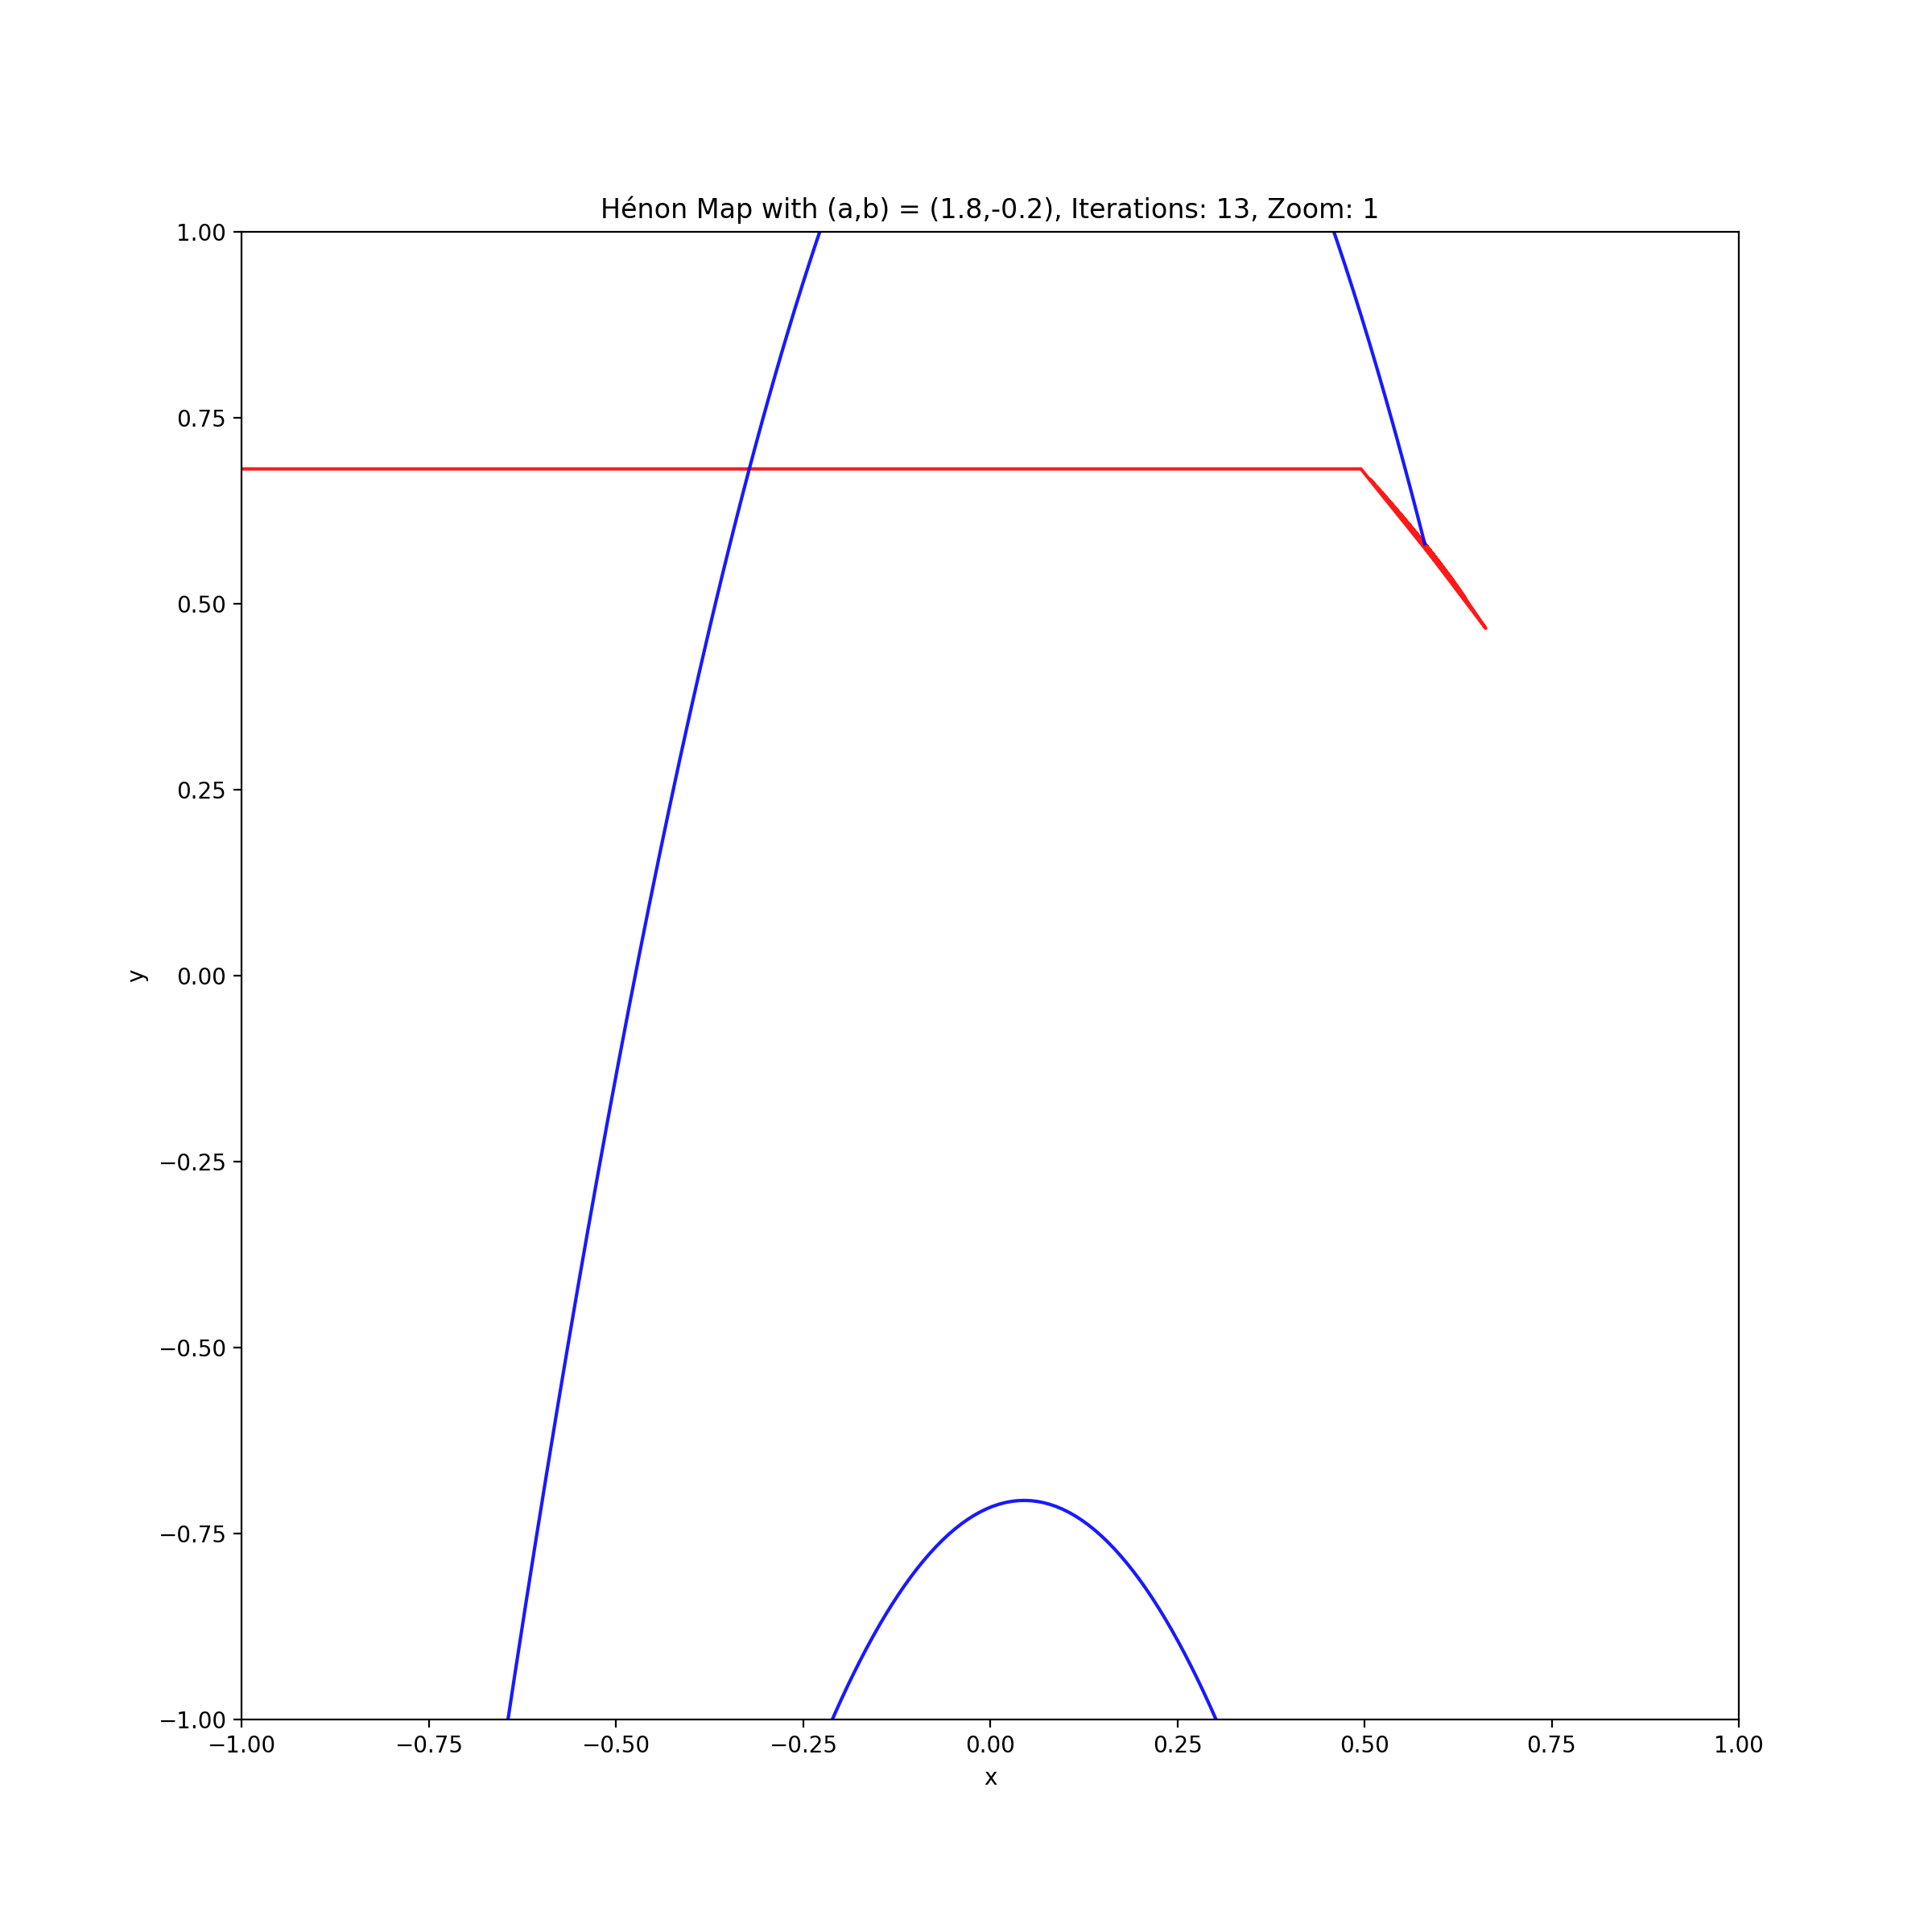

In [9]:
q = [0,0]#[1.4985050280406014, -0.01692932242739087]#[1.1353938070711052 ,  -0.005763692661375804]#[1.3123012147418405, -0.015164865100711244]
midx = q[0]
midy = q[1]

p1, p2 = getPeriodic(a_val,b_val)
lim = 1

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


plt.xlim([midx-lim,midx+lim])
plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_4sink) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=1)
ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=1)
#ax.plot(xu_valsSink, yu_valsSink, '--', color='crimson', alpha = 0.9, markersize=1)
#ax.plot(xs_valsSink, ys_valsSink, '-', color='purple', alpha = 0.9, markersize=10)
# ax.plot(xu_valsSink1,yu_valsSink1, ',',color='red')
# ax.plot(xu_valsSink2,yu_valsSink2, ',',color='red')
# ax.plot(xu_valsSink3,yu_valsSink3, ',',color='red')

# ax.plot(x_vals_step2,y_vals_step2, ',',color='blue')
# ax.plot(x_vals_step3,y_vals_step3, ',',color='blue')
# ax.plot(x_vals_step3_2,y_vals_step3_2, ',',color='blue')
# ax.plot(x_vals_step3_3, y_vals_step3_3, ',',color='blue')
# ax.plot(x_vals_step3_4, y_vals_step3_4, ',',color='black')

# ax.plot(x_vals_step4,y_vals_step4, ',',color='green')
# ax.plot(x_vals_step4_1,y_vals_step4_1, ',',color='green')
# ax.plot(x_vals_step4_2, y_vals_step4_2 , ',',color='green')
# ax.plot(x_vals_step4_3, y_vals_step4_3 , ',',color='green')
# ax.plot(x_vals_step4_4, y_vals_step4_4 , ',',color='green')

# ax.plot(x_vals_step5, y_vals_step5 , '-',color='purple')
# ax.plot(x_vals_step5_1, y_vals_step5_1 , '-',color='purple')
# ax.plot(x_vals_step5_2, y_vals_step5_2 , '-',color='purple')
# ax.plot(x_vals_step5_3, y_vals_step5_3 , '-',color='purple')
# ax.plot(x_vals_step5_4, y_vals_step5_4 , 'o',color='purple')

#ax.plot(xu_valsSink4,yu_valsSink4, ',',color='black')


#ax.plot([p1,p2],[p1,p2],'x',color = 'black', alpha = 1, markersize = 5) 
#ax.plot([q[0]], [q[1]], 'x', color='black', alpha = 0.9, markersize=20)
#qIm = hMap(1.0794520416881797,b_val,q[0],q[1])
#ax.plot(qIm, [q[0]], 'x', color='blue', alpha = 0.9, markersize=20)
#qPre_y = backwards_hMap(1.0794520416881797,b_val,q[0],q[1])
#qPre_x = q[1]
#ax.plot(q[1],qPre_y, 'x', color='black', alpha = 0.9, markersize=20)
#create line going to the left of the stable manifold
#two points to the left and connect with a line.
# s_tan = 35.84950070075259
# diff = 0.3
# lp1_y = ys_val(b_val,a_val, s_tan-diff)
# lp2_y = ys_val(b_val,a_val, s_tan+diff)

# r = 0.0265
# lp1_x = xs_val(b_val,a_val, s_tan-diff)-r
# lp2_x = xs_val(b_val,a_val, s_tan+diff)-r
# p1, p2 = Point(lp1_x, lp1_y),  Point(lp2_x, lp2_y)
# currline = Line(p1,p2)


# eig = get_eig(b_val,a_val)[1]
# s_para = s * (eig**N)


# u= symbols('u')
# v = symbols('v') #y variable


# dx = lp2_x - lp1_x
# dy = lp2_y - lp1_y

# l_rX = lp1_x + u * dx
# l_rY = lp1_y + u * dy

# print(lp1_x,lp2_x)
# print(lp1_y,lp2_y)


# #get pivot point with same y as tangent
# pivot_y = q[1]
# para_pivot = sym.solve(l_rY - pivot_y, u)[0]

# pivot_x = l_rX.subs(u, para_pivot)

# #use pivot along with line to get perpendicular line
# dx_perp = -dy
# dy_perp = dx
# print(-dx/dy)
# l_rXperp = pivot_x + u*dx_perp
# l_rYperp = pivot_y + u*dy_perp

# l_rXval = np.zeros(100)
# l_rYval = np.zeros(100)

# u_vals = np.linspace(0,1,100)

# for i in range(100):
#     l_rXval[i] = sym.N(l_rX.subs(u,u_vals[i]))
#     l_rYval[i] = sym.N(l_rY.subs(u,u_vals[i])) #Good

    
    
# #apply henon n times to perp line
# n=4
# linexi_p = l_rXperp
# lineyi_p = l_rYperp
# for i in range(n):
#     oldlinex_p = linexi_p
#     oldliney_p = lineyi_p
    
#     newlinex_p = hMap(a_val,b_val,oldlinex_p, oldliney_p)
#     newliney_p = oldlinex_p
    
#     linexi_p = newlinex_p
#     lineyi_p = newliney_p

# #let's see what it looks like too
# density_perp = 1000
# l_rXperpVal = np.zeros(density_perp)
# l_rYperpVal = np.zeros(density_perp)
# linexi_pVals = np.zeros(density_perp)
# lineyi_pVals = np.zeros(density_perp)
# uperp_vals = np.linspace(-0.5,0.5,density_perp)
# density_perp = 300

# for i in range(density_perp):
#     linexi_pVals[i] = sym.N(linexi_p.subs(u,uperp_vals[i]))
#     lineyi_pVals[i] = sym.N(lineyi_p.subs(u,uperp_vals[i]))
#     l_rXperpVal[i] = sym.N(l_rXperp.subs(u,uperp_vals[i]))
#     l_rYperpVal[i] = sym.N(l_rYperp.subs(u,uperp_vals[i]))



# ax.plot(l_rXval,l_rYval, '--',color='black')
# ax.plot([pivot_x],[pivot_y],'o',color='black')
# ax.plot(l_rXperpVal,l_rYperpVal,'-',color='black')
# ax.plot(linexi_pVals,lineyi_pVals,'-',color='brown' )
#ax.plot([0.716816443465887], [-0.905098265860288],'x',color = 'green')


In [9]:
dyds = (ys_valsTan[-1] - ys_valsTan[-2])/((stRight_cut-stLeft_cut)/density)
dxds = (xs_valsTan[-1] - xs_valsTan[-2])/((stRight_cut-stLeft_cut)/density)
print(dyds / dxds) 
print() 
print((stRight_cut-stLeft_cut)/density)

965.8268165083084

0.02


In [10]:
%matplotlib nbagg
import matplotlib

matplotlib.use('nbagg')

0.5057058165782117


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.25


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:24: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.5


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:32: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.75


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:39: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.505705816578212


<IPython.core.display.Javascript object>


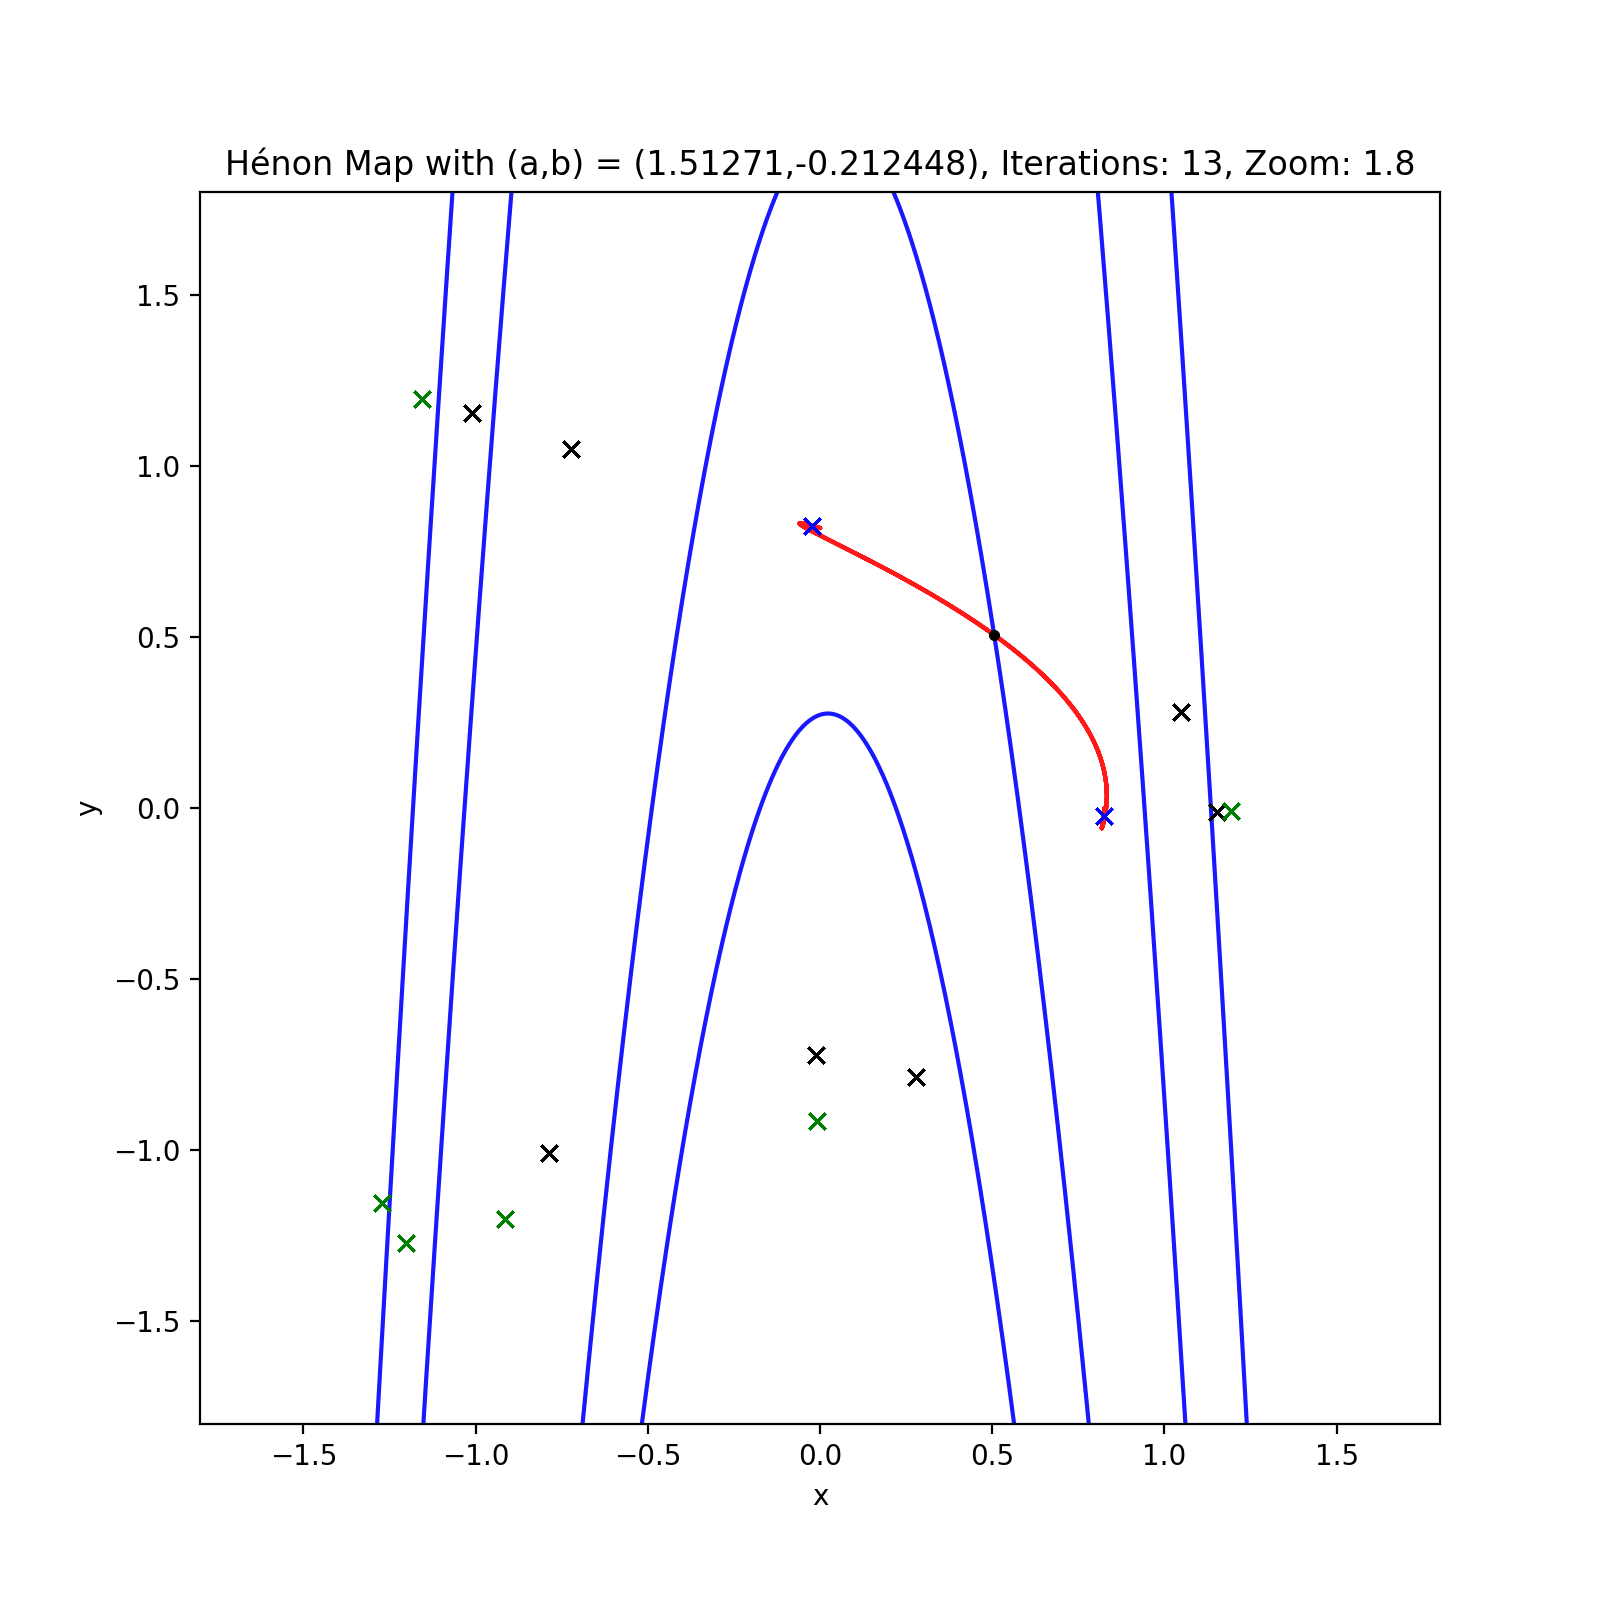

In [11]:
b_val, a_val = -0.212448, 1.51271#Tangent Per 6: -0.30266666666665937 , 1.3032275   # Tangent:  -0.302575, 1.3033249088285506083 

#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

uCut = 2
unstLeft_cut =   -30#-7#0 #1.4
unstRight_cut =  30#23.756557715661007#2.58401023 

sCut = 10
stLeft_cut = -1500#-656.8479902992511
stRight_cut = 1500

density = 300000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [1.2374246239169595 ,  -0.008336054464298156] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 1.8
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


plt.xlim([midx-lim,midx+lim])
plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'.',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)

x_i,y_i =-1.0093, 1.15322 #per 7
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
x_i,y_i =-1.20153, -1.27184#per 6
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='green')

x_i,y_i = 0.824139, -0.0226314 #per 2
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='blue')

In [18]:
per, dumb = getPeriodic(a_val,b_val)

x_new = hMap(a_val,b_val,1.2374246239169595 ,  -0.008336054464298156)
y_new = 1.2374246239169595
print(x_new,y_new)

x_2, y_2 = hMap(a_val,b_val,x_new,y_new), x_new
print(x_2, y_2)

x_3, y_3 = hMap(a_val,b_val,x_2,y_2), x_2
print(x_3, y_3)

x_4, y_4 = hMap(a_val,b_val,x_3,y_3), x_3
print(x_4, y_4)

x_5, y_5 = hMap(a_val,b_val,x_4,y_4), x_4

x_6, y_6 = hMap(a_val,b_val,x_5,y_5), x_5

x_7, y_7 = hMap(a_val,b_val,x_6,y_6), x_6

x_8, y_8 = hMap(a_val,b_val,x_7,y_7), x_7

x_9, y_9 = hMap(a_val,b_val,x_8,y_8), x_8





-1.1908182667144016 1.2374246239169595
-1.33682041659275 -1.1908182667144016
-1.2648239403074901 -1.33682041659275
-0.9604696142120941 -1.2648239403074901


<IPython.core.display.Javascript object>


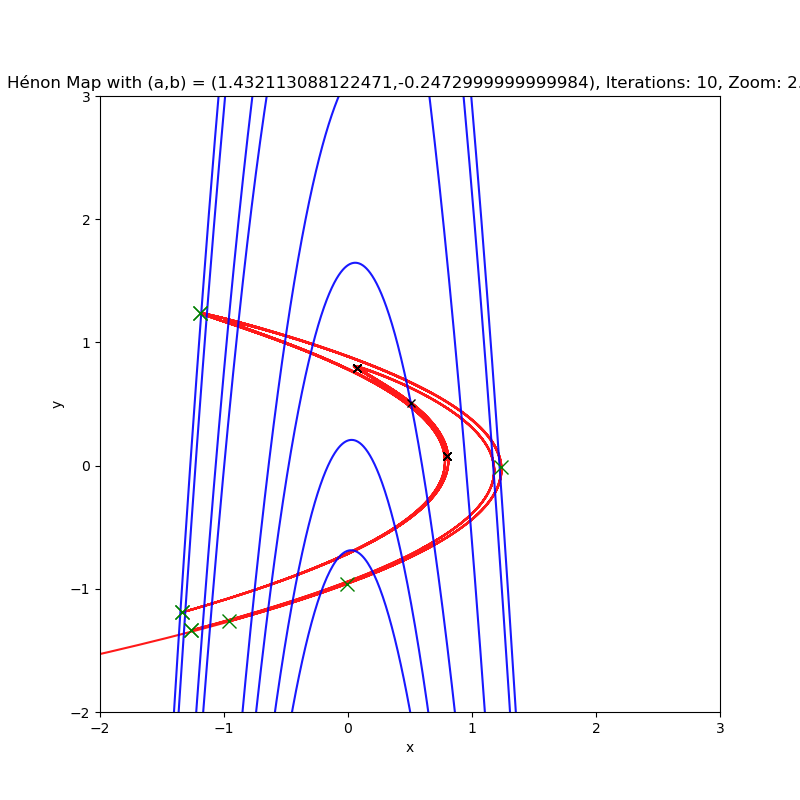

In [19]:
lim = 2.5
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 
midx,midy = 0.5,0.5

plt.xlim([midx-lim,midx+lim])
plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)
ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)


ax.plot([p1],[p1],'x',color='black')

ax.plot([x_new],[ y_new],'x',color='green',markersize = 10)
ax.plot([x_2], [y_2],'x',color='green',markersize = 10)
ax.plot([x_3], [y_3],'x',color='green',markersize = 10)
ax.plot([x_4], [y_4],'x',color='green',markersize = 10)
ax.plot([x_5], [y_5],'x',color='green',markersize = 10)
ax.plot([x_6], [y_6],'x',color='green',markersize = 10)
ax.plot([x_7], [y_7],'x',color='green',markersize = 10)
ax.plot([x_8], [y_8],'x',color='green',markersize = 10)
ax.plot([x_9], [y_9],'x',color='green',markersize = 10)


In [ ]:
#-0.3025999999999927 , 1.30338335595347 , 1.3166934841628513 , -0.010999611257611243
b_val, a_val,q0,q1 = -0.29797500000001376 ,  1.3079440475099107 ,-0.916881534536754 ,  1.212831204682723
q = [ q0,q1] 

#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

uCut = 2
unstLeft_cut =   0#-7#0 #1.4
unstRight_cut =  2#1.0864701411105149 
sCut = 10
stLeft_cut = 0#-656.8479902992511
stRight_cut = 1500#917.140730948713

density = 100000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*15,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*15,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

#q = [ 1.3046317865458499, -0.01059707357720021] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 1.8
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


plt.xlim([midx-lim,midx+lim])
plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'x',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)
per, dumb = getPeriodic(a_val,b_val)

x_new = hMap(a_val,b_val,q[0],q[1])
y_new = q[0]
print(x_new,y_new)

x_2, y_2 = hMap(a_val,b_val,x_new,y_new), x_new
print(x_2, y_2)

x_3, y_3 = hMap(a_val,b_val,x_2,y_2), x_2
print(x_3, y_3)

x_4, y_4 = hMap(a_val,b_val,x_3,y_3), x_3
print(x_4, y_4)

x_5, y_5 = hMap(a_val,b_val,x_4,y_4), x_4

x_6, y_6 = hMap(a_val,b_val,x_5,y_5), x_5

x_7, y_7 = hMap(a_val,b_val,x_6,y_6), x_6

x_8, y_8 = hMap(a_val,b_val,x_7,y_7), x_7

x_9, y_9 = hMap(a_val,b_val,x_8,y_8), x_8


lim = 2.5
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 
midx,midy = 0.422756866704188,0.422756866704188

plt.xlim([midx-lim,midx+lim])
plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)
ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)


#ax.plot([p1],[p1],'x',color='black')

ax.plot([q[0]],[q[1]],'x',color='blue',markersize = 10)
ax.plot([x_new],[ y_new],'x',color='green',markersize = 10)
ax.plot([x_2], [y_2],'x',color='red',markersize = 10)
ax.plot([x_3], [y_3],'x',color='black',markersize = 10)
ax.plot([x_4], [y_4],'x',color='pink',markersize = 10)
ax.plot([x_5], [y_5],'x',color='purple',markersize = 10)
ax.plot([x_6], [y_6],'.',color='blue',markersize = 10)
ax.plot([x_7], [y_7],'.',color='green',markersize = 10)
ax.plot([x_8], [y_8],'.',color='red',markersize = 10)
ax.plot([x_9], [y_9],'.',color='black',markersize = 10)
x_i,y_i =1.3167979475542877 , -0.0110030936308696
for i in range(1000):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
#ax.plot([-0.9185],[1.2156],'x')
print()

<IPython.core.display.Javascript object>


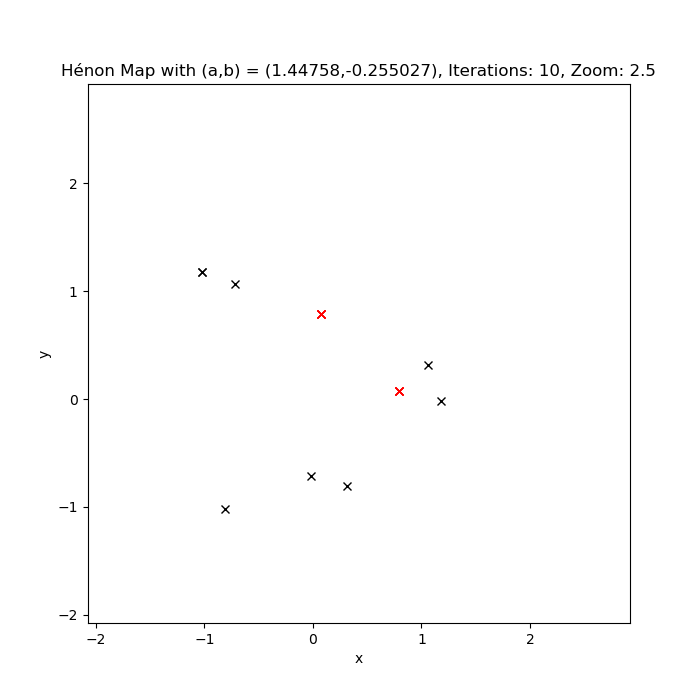

In [32]:

b_val,a_val= -0.255027, 1.44758
lim = 2.5
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 
midx,midy = 0.422756866704188,0.422756866704188
plt.xlim([midx-lim,midx+lim])
plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))

x_i,y_i =-1.02028 , 1.18253
for i in range(8):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
x_i,y_i =0.0770315 , 0.789951
for i in range(8):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='red')

<IPython.core.display.Javascript object>


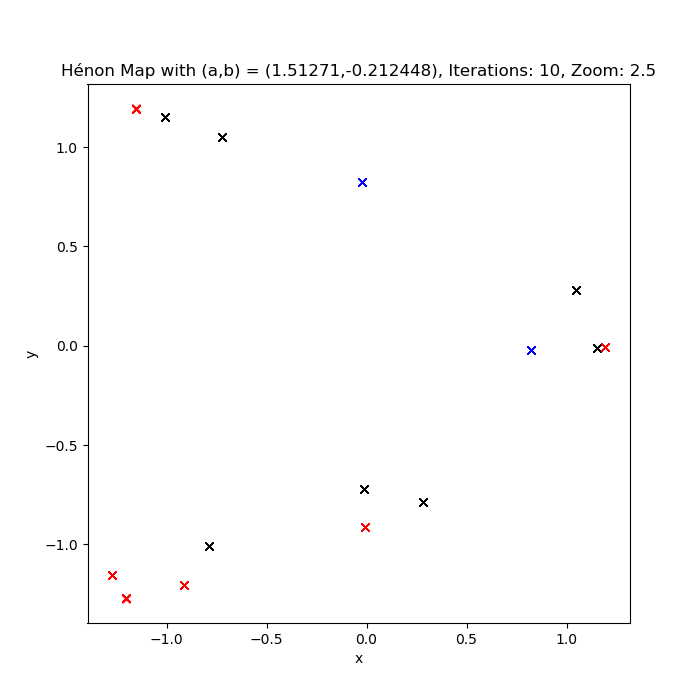

In [42]:

b_val,a_val= -0.212448, 1.51271 #three periods coexisting
lim = 2.5
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 
midx,midy = 0.422756866704188,0.422756866704188
#plt.xlim([midx-lim,midx+lim])
#plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))

x_i,y_i =-1.0093, 1.15322 #per 7
for i in range(1000):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
x_i,y_i =-1.20153, -1.27184#per 6
for i in range(1000):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='red')

x_i,y_i = 0.824139, -0.0226314 #per 2
for i in range(1000):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='blue')

0.4923045133729222
0.25
0.5
0.75
0.523905509571447


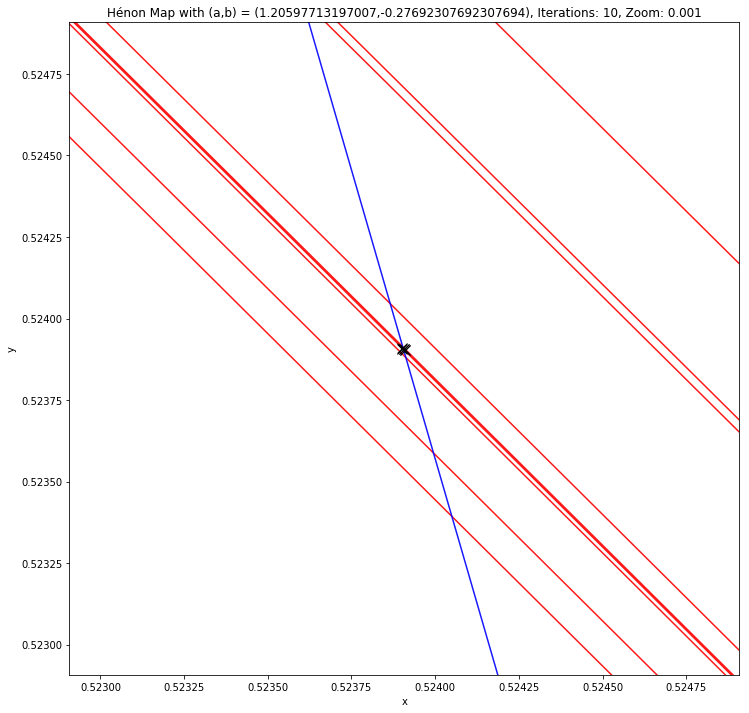

In [12]:
b_val, a_4sink = -0.27692307692307694, 1.20597713197007 # a_tan+3per = 1.205240817 ;#3-sink: -0.3, 1.1731985079533807#1.0794520416881797 
 
#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

uCut = 2
unstLeft_cut =  -1# 0#0 #1.4
unstRight_cut =  .7#0.68570458471008186 #0.68570458471008186 

sCut = 10
stLeft_cut = -300#-300 #-3.42638566
stRight_cut = 400#57.72901269421593#0

density = 10000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_vals4 = get_xu(b_val,a_4sink,density*10,unstLeft_cut,unstRight_cut)

print(1/4)
yu_vals4 = get_yu(b_val,a_4sink,density*10,unstLeft_cut,unstRight_cut)
print(1/2)



xs_vals4 = get_xs(b_val,a_4sink,density,stLeft_cut,stRight_cut)
print(3/4)
ys_vals4 = get_ys(b_val,a_4sink,density,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [0.5239076075518418,0.5239076075518418] #[ -0.647547738804144, -1.033515026323263] #[-0.5144679256975768, -0.7093697010834852]

q1 = hMap(a_4sink,b_val,q[0],q[1])
q2 = hMap(a_4sink,b_val,q1,q[0])
q3 = hMap(a_4sink,b_val,q2,q1)
q4 = hMap(a_4sink,b_val,q3,q2)

# midx = q[0]
# midy = q[1]

p1, p2 = getPeriodic(a_4sink,b_val)
midx,midy  = [0.5239076075518418,0.5239076075518418]#[-0.647547738804144,-1.033515026323263]
print(p1)

lim = 0.001


fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


plt.xlim([midx-lim,midx+lim])
plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_4sink) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_vals4, yu_vals4, '-', color='red', alpha = 0.9, markersize=.1)
ax.plot(xs_vals4, ys_vals4, '-', color='blue', alpha = 0.9, markersize=.1)
ax.plot([midx],[midy],'x',color='black',markersize = 10)
ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
ax.plot([q2],[q1],'x',color='black',markersize = 10)
ax.plot([q3],[q2],'x',color='black',markersize = 10)
ax.plot([q4],[q3],'x',color='black',markersize = 10)


In [154]:
print(linex0.subs([(t,0.68570458471008186),(a, 1.2047255045973881), (b, b_val)]))
print(liney0.subs([(t,0.68570458471008186),(a, 1.2047255045973881), (b, b_val)]))

1.20963666520235
0.329598858559242


In [156]:
bnewtan =[-0.2923076923076923,-0.2871794871794872,-0.28205128205128205,-0.27692307692307694,-0.27179487179487183,-0.2666666666666667,-0.26153846153846155,-0.25641025641025644,-0.2512820512820513,-0.24615384615384617,-0.24102564102564106,-0.23589743589743592,-0.23076923076923078,-0.22564102564102567,-0.22051282051282053,-0.2153846153846154,-0.2102564102564103,-0.20512820512820515,-0.2]
anewtan = [1.1623676832287304,1.1772759911768231,1.1915680048600967,1.205957713197807,1.221616515456778,1.2337876111570396,1.248119674757526,1.261528200923354,1.274975683904535,1.2895959852451147,1.302752732556629,1.316553300169872,1.328967436759791,1.3424656035333515,1.3560144658485787,1.3687054623780484,1.3817023066626266,1.394576108585682,1.4073111662832902]

In [122]:
dens_tan=582
ba_list = np.loadtxt("new_per3Tan_ba_for.txt").reshape(dens_tan, 2)
b_listFP,a_listFP = np.zeros(dens_tan),np.zeros(dens_tan)
for i in range(dens_tan):
    b_listFP[i] = ba_list[i][0]
    a_listFP[i] = ba_list[i][1]
#xy_list = np.loadtxt("new_3sink_xy_for.txt").reshape(dens_tan, 2)
# x_list,y_list = np.zeros(dens_tan),np.zeros(dens_tan)
# for i in range(dens_tan):
#     x_list[i] = xy_list[i][0]
#     y_list[i] = xy_list[i][1]




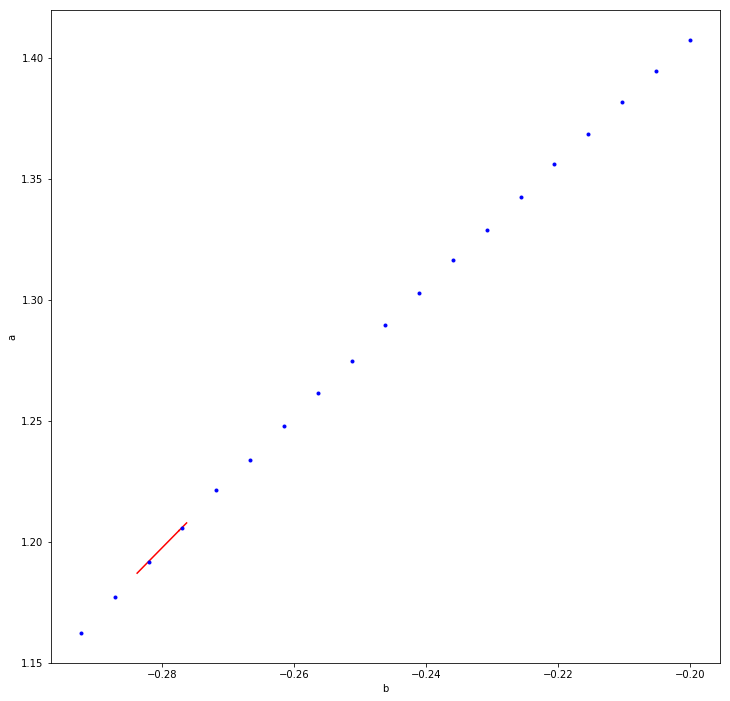

In [131]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('b') 
plt.ylabel('a') 

plt.plot(b_listBP,a_listBP,'-',color='red')
plt.plot(b_listFP,a_listFP,'-',color='red')
plt.plot(bnewtan,anewtan,'.',color='blue')

0.0 %
16.666666666666664 %
33.33333333333333 %
50.0 %
66.66666666666666 %
83.33333333333334 %


MovieWriter ffmpeg unavailable. Trying to use pillow instead.


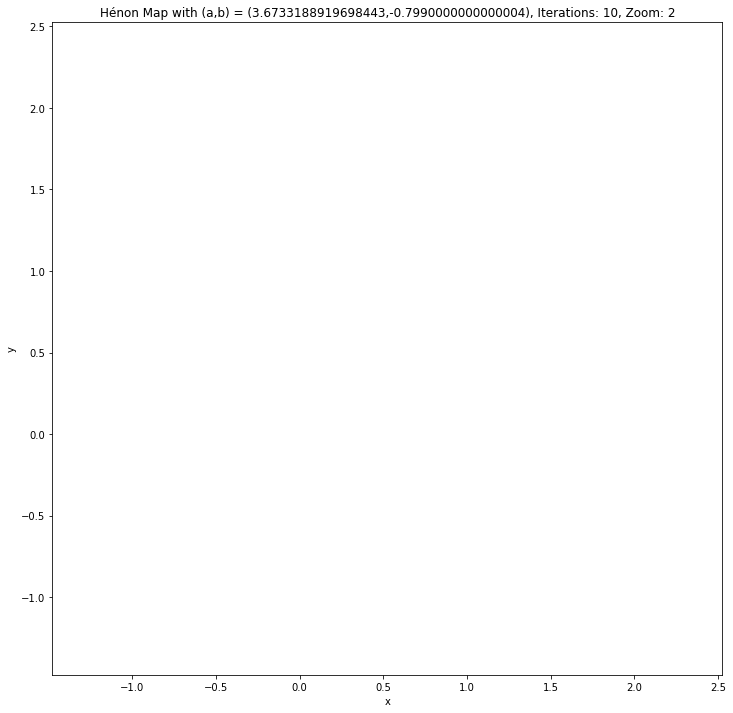

In [126]:
import imageio
import os
from IPython.display import HTML
from celluloid import Camera
import ffmpeg
fig, ax = plt.subplots(figsize=(12, 12))
camera = Camera(fig)

def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

for j in range(0,dens_tan,100):
    print( j/dens_tan * 100 ,'%')
    #fig, ax = plt.subplots(figsize=(12, 12)) # let's make it bigger

    
    b_val, a_4sink = b_list[j],a_list[j] #3-sink: 1.1731985079533807 #1.0794520416881797 

    #a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
    #b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

    uCut = 2
    unstLeft_cut =   -10#0 #1.4
    unstRight_cut =  30 #2.58401023 

    sCut = 10
    stLeft_cut = -10 #-3.42638566
    stRight_cut = 10#0

    density = 50000
    #unstRight_cut, stRight_cut = -100000, -55000
    u_eig, s_eig = get_eig(b_val,a_val)
    #print(p_n(b_val,a_val))

    xu_vals4 = get_xu(b_val,a_4sink,density*20,unstLeft_cut,unstRight_cut)

    #print(1/4)
    yu_vals4 = get_yu(b_val,a_4sink,density*20,unstLeft_cut,unstRight_cut)
    #print(1/2)



    xs_vals4 = get_xs(b_val,a_4sink,density,stLeft_cut,stRight_cut)
    #print(3/4)
    ys_vals4 = get_ys(b_val,a_4sink,density,stLeft_cut,stRight_cut)

    # for i in range(100):
    #     print(xu_valsTan[i],yu_valsTan[i])
    #     print(xs_valsTan[i],ys_valsTan[i])
    #     print('-------------------------')

    q = [x_list[j], y_list[j]] #[-0.5144679256975768, -0.7093697010834852]

    q1 = hMap(a_4sink,b_val,q[0],q[1])
    q2 = hMap(a_4sink,b_val,q1,q[0])
    q3 = hMap(a_4sink,b_val,q2,q1)
    q4 = hMap(a_4sink,b_val,q3,q2)

    # midx = q[0]
    # midy = q[1]

    p1, p2 = getPeriodic(a_4sink,b_val)
    midx,midy  = 0.523842244875394,0.523842244875394
    #print(p1)

    lim = 2

    plt.xlabel('x') 
    plt.ylabel('y') 


    plt.xlim([midx-lim,midx+lim])
    plt.ylim([midy-lim,midy+lim])
    plt.title("Tracing Tangency Curve")
    #plt.title('Hénon Map with (a,b) = (' + str(a_4sink) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
    ax.plot(xu_vals4, yu_vals4, '-', color='red', alpha = 0.9, markersize=.1)
    ax.plot(xs_vals4, ys_vals4, '-', color='blue', alpha = 0.9, markersize=.1)
    plt.legend('(a,b) = ' + str(a_4sink) + ',' + str(b_val))
    #ax.plot([midx],[midy],'x',color='black',markersize = 10)
    ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
    ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
    ax.plot([q2],[q1],'x',color='black',markersize = 10)
    ax.plot([q3],[q2],'x',color='black',markersize = 10)
    ax.plot([q4],[q3],'x',color='black',markersize = 10)
    camera.snap()

    
    
#     filename = f'{i}.png'
#     i+=1
#     filenames.append(filename)
#     # save frame
#     plt.savefig(filename)
#     plt.close()
animation = camera.animate()
animation.save('animation0.gif')
#HTML(animation.to_html5_video())

In [10]:
dens_tan=4999

ba_list1 = np.loadtxt("new_3sink_ba_for.txt")#.reshape(dens_tan, 2)
print(len(ba_list1))
b_list1,a_list1 = np.zeros(dens_tan),np.zeros(dens_tan)
ba_list1 = ba_list1.reshape(dens_tan,2)
for i in range(dens_tan):
    b_list1[i] = ba_list1[i][0]
    a_list1[i] = ba_list1[i][1]
xy_list1 = np.loadtxt("new_3sink_xy_for.txt").reshape(dens_tan, 2)
x_list1,y_list1 = np.zeros(dens_tan),np.zeros(dens_tan)
for i in range(dens_tan):
    x_list1[i] = xy_list1[i][0]
    y_list1[i] = xy_list1[i][1]
    

9998


0.0 %
0.8333333333333334 %
1.6666666666666667 %
2.5 %
3.3333333333333335 %
4.166666666666666 %
5.0 %
5.833333333333333 %
6.666666666666667 %
7.5 %
8.333333333333332 %
9.166666666666666 %
10.0 %
10.833333333333334 %
11.666666666666666 %
12.5 %
13.333333333333334 %
14.166666666666666 %
15.0 %
15.833333333333332 %
16.666666666666664 %
17.5 %
18.333333333333332 %
19.166666666666668 %
20.0 %
20.833333333333336 %
21.666666666666668 %
22.5 %
23.333333333333332 %
24.166666666666668 %
25.0 %
25.833333333333336 %
26.666666666666668 %
27.500000000000004 %
28.333333333333332 %
29.166666666666668 %
30.0 %
30.833333333333336 %
31.666666666666664 %
32.5 %
33.33333333333333 %
34.166666666666664 %
35.0 %
35.833333333333336 %
36.666666666666664 %
37.5 %
38.333333333333336 %
39.166666666666664 %
40.0 %
40.833333333333336 %
41.66666666666667 %
42.5 %
43.333333333333336 %
44.166666666666664 %
45.0 %
45.83333333333333 %


MovieWriter ffmpeg unavailable. Trying to use pillow instead.


46.666666666666664 %
47.5 %
48.333333333333336 %
49.166666666666664 %
50.0 %
50.83333333333333 %
51.66666666666667 %
52.5 %
53.333333333333336 %
54.166666666666664 %
55.00000000000001 %
55.833333333333336 %
56.666666666666664 %
57.49999999999999 %
58.333333333333336 %
59.166666666666664 %
60.0 %
60.83333333333333 %
61.66666666666667 %
62.5 %
63.33333333333333 %
64.16666666666667 %
65.0 %
65.83333333333333 %
66.66666666666666 %
67.5 %
68.33333333333333 %
69.16666666666667 %
70.0 %
70.83333333333334 %
71.66666666666667 %
72.5 %
73.33333333333333 %
74.16666666666667 %
75.0 %
75.83333333333333 %
76.66666666666667 %
77.5 %
78.33333333333333 %
79.16666666666666 %
80.0 %
80.83333333333333 %
81.66666666666667 %
82.5 %
83.33333333333334 %
84.16666666666667 %
85.0 %
85.83333333333333 %
86.66666666666667 %
87.5 %
88.33333333333333 %
89.16666666666667 %
90.0 %
90.83333333333333 %
91.66666666666666 %
92.5 %
93.33333333333333 %
94.16666666666667 %
95.0 %
95.83333333333334 %
96.66666666666667 %
97.5 

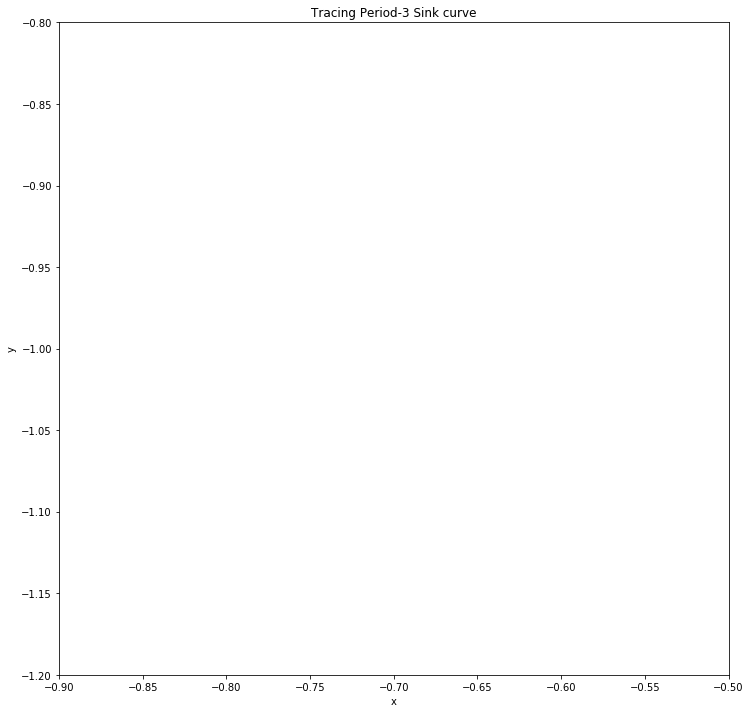

In [16]:
import imageio
import os
from IPython.display import HTML
from celluloid import Camera
import ffmpeg
fig, ax = plt.subplots(figsize=(12, 12))
camera = Camera(fig)

def init():
    line.set_data([], [])
    return (line,)
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

end = 1200
for j in range(0,end,10):#dens_tan
    print( j/end * 100 ,'%')
    if (-0.27745 < b_list1[j] < -0.27245):
        
        #if (j/end * 100  > 79):
        #    break
        #fig, ax = plt.subplots(figsize=(12, 12)) # let's make it bigger


        b_val, a_4sink = b_list1[j],a_list1[j] #3-sink: 1.1731985079533807 #1.0794520416881797 

        #a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
        #b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

        uCut = 2
        unstLeft_cut =   0#0 #1.4
        unstRight_cut =  2.8 #2.58401023 

        sCut = 10
        stLeft_cut = -200 #-3.42638566
        stRight_cut = 200#0

        density = 50000
        #unstRight_cut, stRight_cut = -100000, -55000
        #u_eig, s_eig = get_eig(b_val,a_val)
        #print(p_n(b_val,a_val))

        xu_vals4 = get_xu(b_val,a_4sink,density*30,unstLeft_cut,unstRight_cut)

        #print(1/4)
        yu_vals4 = get_yu(b_val,a_4sink,density*30,unstLeft_cut,unstRight_cut)
        #print(1/2)



        xs_vals4 = get_xs(b_val,a_4sink,density*10,stLeft_cut,stRight_cut)
        #print(3/4)
        ys_vals4 = get_ys(b_val,a_4sink,density*10,stLeft_cut,stRight_cut)

        # for i in range(100):
        #     print(xu_valsTan[i],yu_valsTan[i])
        #     print(xs_valsTan[i],ys_valsTan[i])
        #     print('-------------------------')

        q = [x_list1[j], y_list1[j]] #[-0.5144679256975768, -0.7093697010834852]

        q1 = hMap(a_4sink,b_val,q[0],q[1])
        q2 = hMap(a_4sink,b_val,q1,q[0])
        q3 = hMap(a_4sink,b_val,q2,q1)
        q4 = hMap(a_4sink,b_val,q3,q2)

        # midx = q[0]
        # midy = q[1]

        p1, p2 = getPeriodic(a_4sink,b_val)
        midx,midy  = -0.7,-1.0
        #print(p1)

        lim = .2

        plt.xlabel('x') 
        plt.ylabel('y') 


        plt.xlim([midx-lim,midx+lim])
        plt.ylim([midy-lim,midy+lim])
        plt.title("Tracing Period-3 Sink curve")
        #plt.title('Hénon Map with (a,b) = (' + str(a_4sink) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
        t = ax.plot(xu_vals4, yu_vals4, '-', color='red', alpha = 0.9, markersize=.1)
        ax.plot(xs_vals4, ys_vals4, '-', color='blue', alpha = 0.9, markersize=.1)
        #ax.plot([midx],[midy],'x',color='black',markersize = 10)
        ax.legend(t, ['b,a: '+str(b_val)+', '+str( a_4sink)+"; "+str(i)])
        #plt.legend((,), ('b,a: '+str(b_val)+str( a_4sink),))
        #plt.legend('(a,b) = ' + str(a_4sink) + ',' + str(b_val))
        ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
        ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
        ax.plot([q2],[q1],'x',color='black',markersize = 10)
        ax.plot([q3],[q2],'x',color='black',markersize = 10)
        ax.plot([q4],[q3],'x',color='black',markersize = 10)

        camera.snap()

    
    
#     filename = f'{i}.png'
#     i+=1
#     filenames.append(filename)
#     # save frame
#     plt.savefig(filename)
#     plt.close()
animation = camera.animate()
animation.save('animation0.gif')
print("done")
#HTML(animation.to_html5_video())

In [183]:
#print(evecSt[1].subs([(a, 1.20597713197007), (b,-0.27692307692307694 )])) #dx
print(evecSt[0].subs([(a, 1.20597713197007), (b,-0.27692307692307694 )])) #dy  -0.27692307692307694, 1.20597713197007

-0.981490752083491


In [180]:
print(evecUn[0])

-b/2 - sqrt(4*a + (-b + 1)**2)/2 + sqrt(b + (b + sqrt(4*a + (-b + 1)**2) - 1)**2/4) + 1/2


0.5057058165782117
0.25
0.5
0.75
0.505705816578212


<IPython.core.display.Javascript object>


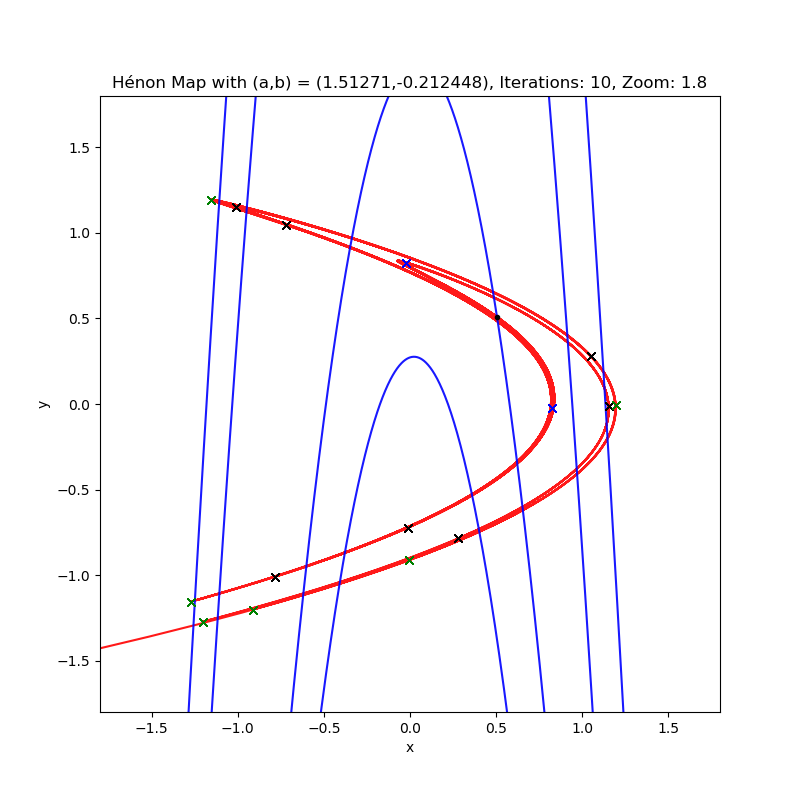

In [41]:
b_val, a_val = -0.212448, 1.51271#Tangent Per 6: -0.30266666666665937 , 1.3032275   # Tangent:  -0.302575, 1.3033249088285506083 

#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

uCut = 2
unstLeft_cut =   -30#-7#0 #1.4
unstRight_cut =  30#23.756557715661007#2.58401023 

sCut = 10
stLeft_cut = -1500#-656.8479902992511
stRight_cut = 1500

density = 300000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [1.2374246239169595 ,  -0.008336054464298156] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 1.8
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


plt.xlim([midx-lim,midx+lim])
plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'.',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)

x_i,y_i =-1.0093, 1.15322 #per 7
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
x_i,y_i =-1.20153, -1.27184#per 6
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='green')

x_i,y_i = 0.824139, -0.0226314 #per 2
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='blue')

0.5057058165782117
0.25
0.5
0.75
0.505705816578212


<IPython.core.display.Javascript object>


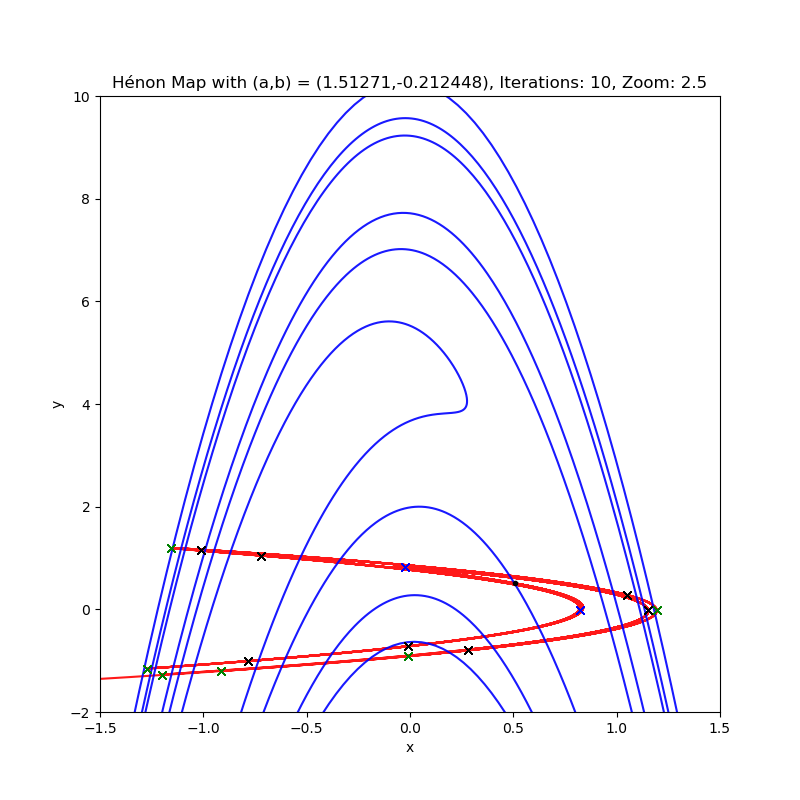

In [80]:
b_val, a_val = -0.212448, 1.51271#Tangent Per 6: -0.30266666666665937 , 1.3032275   # Tangent:  -0.302575, 1.3033249088285506083 

#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

uCut = 2
unstLeft_cut =   -20#-7#0 #1.4
unstRight_cut =  20#23.756557715661007#2.58401023 

sCut = 10
stLeft_cut = -15000#-656.8479902992511
stRight_cut = 15000

density = 300000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*10,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*10,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density*3,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density*3,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [1.2374246239169595 ,  -0.008336054464298156] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 2.5
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


#plt.xlim([midx-lim,midx+lim])
plt.xlim(-1.5,1.5)
plt.ylim(-2,10)
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'.',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)

x_i,y_i =-1.0093, 1.15322 #per 7
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
x_i,y_i =-1.20153, -1.27184#per 6
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='green')

x_i,y_i = 0.824139, -0.0226314 #per 2
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='blue')

<IPython.core.display.Javascript object>


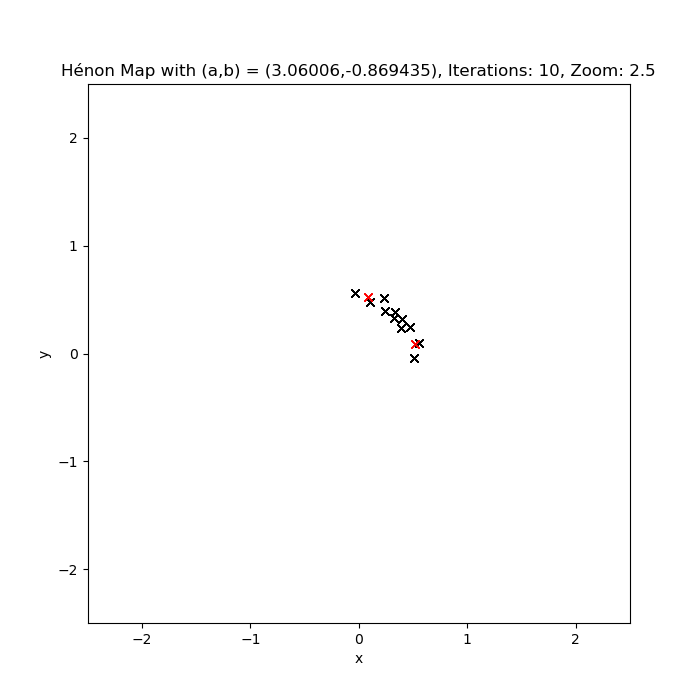

In [46]:
b_val,a_val=-0.869435, 3.06006
lim = 2.5
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 
midx,midy = 0,0
plt.xlim([midx-lim,midx+lim])
plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))

x_i,y_i =0.244201, 0.394718
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
x_i,y_i =0.0889426, 0.521972
for i in range(8):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='red')

<IPython.core.display.Javascript object>


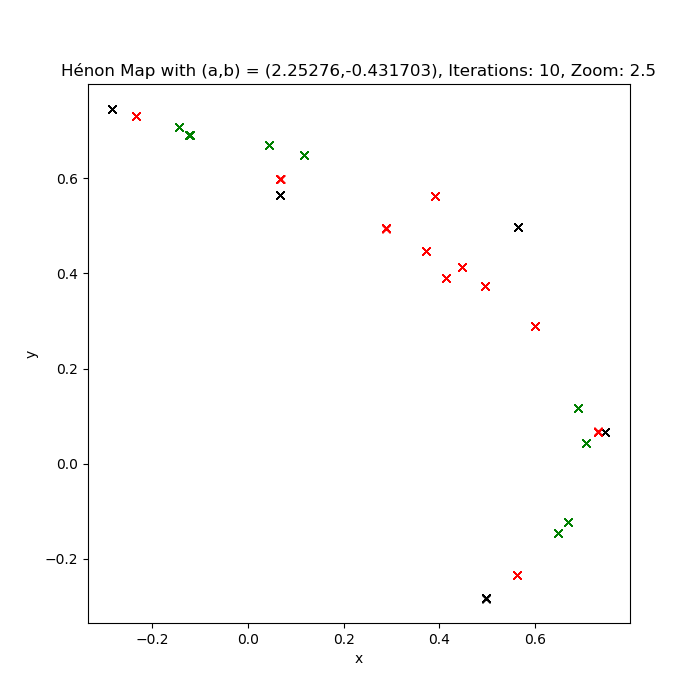

In [89]:
b_val,a_val=-0.431703, 2.25276
lim = 2.5
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 
midx,midy = 0,0
#plt.xlim([midx-lim,midx+lim])
#plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))

x_i,y_i =-0.282927, 0.746159
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
x_i,y_i = -0.233654, 0.731181
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='red')
x_i,y_i = -0.144449, 0.706749
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='green')

<IPython.core.display.Javascript object>


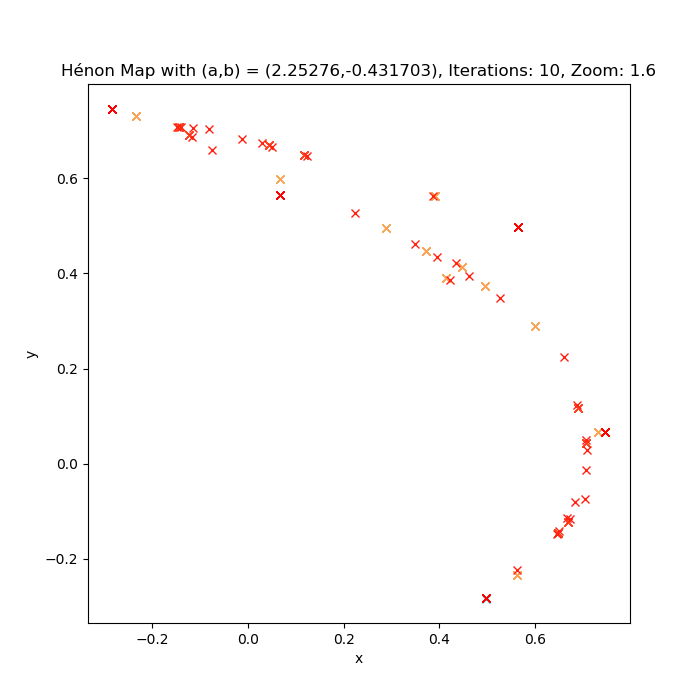

-------------------------------
0 :  [-0.283037, 0.74618]
1 :  [0.4974033794360517, -0.283037]
2 :  [0.564832295857216, 0.4974033794360517]
3 :  [0.06655900534787418, 0.564832295857216]
4 :  [0.7461802486182386, 0.06655900534787418]
5 :  [-0.28303661649770134, 0.7461802486182386]
6 :  [0.4974037611596815, -0.28303661649770134]
7 :  [0.5648312748319033, 0.4974037611596815]
8 :  [0.0665614389240396, 0.5648312748319033]
9 :  [0.7461799595966373, 0.0665614389240396]
10 :  [-0.28303669540961907, 0.7461799595966373]
11 :  [0.4974037853005409, -0.28303669540961907]
12 :  [0.5648312547972365, 0.4974037853005409]
13 :  [0.06656147948775162, 0.5648312547972365]
14 :  [0.7461799560808497, 0.06656147948775162]
15 :  [-0.2830367011012681, 0.7461799560808497]
16 :  [0.4974037795601697, -0.2830367011012681]
17 :  [0.5648312701188704, 0.4974037795601697]
18 :  [0.0665614429744962, 0.5648312701188704]
19 :  [0.7461799604165605, 0.0665614429744962]
20 :  [-0.2830366999147368, 0.7461799604165605]
21 :  [

23 :  [0.7312167235327431, 0.06748363627038285]
24 :  [-0.2336338669653395, 0.7312167235327431]
25 :  [0.5613651292628246, -0.2336338669653395]
26 :  [0.39094636144688344, 0.5613651292628246]
27 :  [0.4133472743638183, 0.39094636144688344]
28 :  [0.44632978969524306, 0.4133472743638183]
29 :  [0.3727837886081392, 0.44632978969524306]
-------------------------------
0 :  [0.0665614, 0.564831]
1 :  [0.7461800899154729, 0.0665614]
2 :  [-0.2830371167286703, 0.7461800899154729]
3 :  [0.4974031917634718, -0.2830371167286703]
4 :  [0.5648327668349297, 0.4974031917634718]
5 :  [0.06655788779233593, 0.5648327668349297]
6 :  [0.7461803804287621, 0.06655788779233593]
7 :  [-0.2830365771834195, 0.7461803804287621]
8 :  [0.4974037543913186, -0.2830365771834195]
9 :  [0.5648312730281346, 0.4974037543913186]
10 :  [0.06656144643629847, 0.5648312730281346]
11 :  [0.746179958122449, 0.06656144643629847]
12 :  [-0.2830366936965676, 0.746179958122449]
13 :  [0.4974037881214829, -0.2830366936965676]
14 :

26 :  [0.731211627842377, 0.06752748406094151]
27 :  [-0.2336360084356826, 0.731211627842377]
28 :  [0.5613650748755579, -0.2336360084356826]
29 :  [0.39094742348459743, 0.5613650748755579]
-------------------------------
0 :  [0.564831, 0.497404]
1 :  [0.06656203522412171, 0.564831]
2 :  [0.7461798994148396, 0.06656203522412171]
3 :  [-0.28303675050724686, 0.7461798994148396]
4 :  [0.4974037410191871, -0.28303675050724686]
5 :  [0.5648313778203338, 0.4974037410191871]
6 :  [0.06656118552773421, 0.5648313778203338]
7 :  [0.7461799911280831, 0.06656118552773421]
8 :  [-0.28303669202414966, 0.7461799911280831]
9 :  [0.49740377600556485, -0.28303669202414966]
10 :  [0.5648312741663433, 0.49740377600556485]
11 :  [0.06656143420878355, 0.5648312741663433]
12 :  [0.7461799612980381, 0.06656143420878355]
13 :  [-0.2830366990940169, 0.7461799612980381]
14 :  [0.4974037798675957, -0.2830366990940169]
15 :  [0.5648312685633728, 0.4974037798675957]
16 :  [0.06656144680030052, 0.5648312685633728]


15 :  [-0.12165715099670496, 0.6895804747732607]
16 :  [0.6689641506483375, -0.12165715099670496]
17 :  [0.04438029266207123, 0.6689641506483375]
18 :  [0.706769109800286, 0.04438029266207123]
19 :  [-0.14446358056665093, 0.706769109800286]
20 :  [0.6478711708000143, -0.14446358056665093]
21 :  [0.11679851545644446, 0.6478711708000143]
22 :  [0.6895801605979881, 0.11679851545644446]
23 :  [-0.1216565021735517, 0.6895801605979881]
24 :  [0.6689646419164058, -0.1216565021735517]
25 :  [0.04437853186526166, 0.6689646419164058]
26 :  [0.706769249793811, 0.04437853186526166]
27 :  [-0.14446326621554154, 0.706769249793811]
28 :  [0.6478713149701335, -0.14446326621554154]
29 :  [0.1167979589180049, 0.6478713149701335]
-------------------------------
0 :  [0.647871, -0.144463]
1 :  [0.11679876338866096, 0.647871]
2 :  [0.6895801038613627, 0.11679876338866096]
3 :  [-0.12165643293064288, 0.6895801038613627]
4 :  [0.6689647043635916, -0.12165643293064288]
5 :  [0.044378313754966946, 0.6689647043

In [74]:
b_val,a_val= -0.431703, 2.25276#-0.212448, 1.51271
lim = 1.6
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 
midx,midy = 0,0
#plt.xlim([midx-lim,midx+lim])
#plt.ylim([midy-lim,midy+lim])
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
x_list = [-0.283037, -0.233636, -0.144463, -0.121657, 0.0443793, 0.116798, 0.0675286, 0.0665614, 0.288727, 0.390947, 0.372778, 0.413345, 0.446333, 0.494265, 0.564831, 0.598828, 0.68958,  0.74618  ,0.731211 , 0.706769,  0.668964, 0.647871, 0.561365, 0.497404] 
y_list = [ 0.74618,   0.731211,  0.706769,  0.68958 , 0.668964,  0.647871, 0.598828 , 0.564831 , 0.494265, 0.561365, 0.446333, 0.390947, 0.413345, 0.372778, 0.497404, 0.288727, 0.116798, 0.0665614,0.0675286, 0.0443793,-0.121657,-0.144463,-0.2233636,-0.283037] 


color = iter(cm.rainbow(np.linspace(0, 1, len(x_list))))
for i in range(len(x_list)):
    x_i,y_i = x_list[i], y_list[i]
    
    c=next(color)
    print('-------------------------------')
    for j in range(30):
        
        xy = NhMap_n(a_val,b_val,x_i,y_i,j,1)
        print(j,': ',xy)
        plt.plot(xy[0],xy[1],'x',c=c)
        
        
# x_i,y_i =-0.283037
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='black')
# x_i,y_i =0.0889426, 0.521972
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='red')

0.4203107317223876


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.25


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:24: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.5


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:32: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.75


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:39: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.420310731722388


<IPython.core.display.Javascript object>


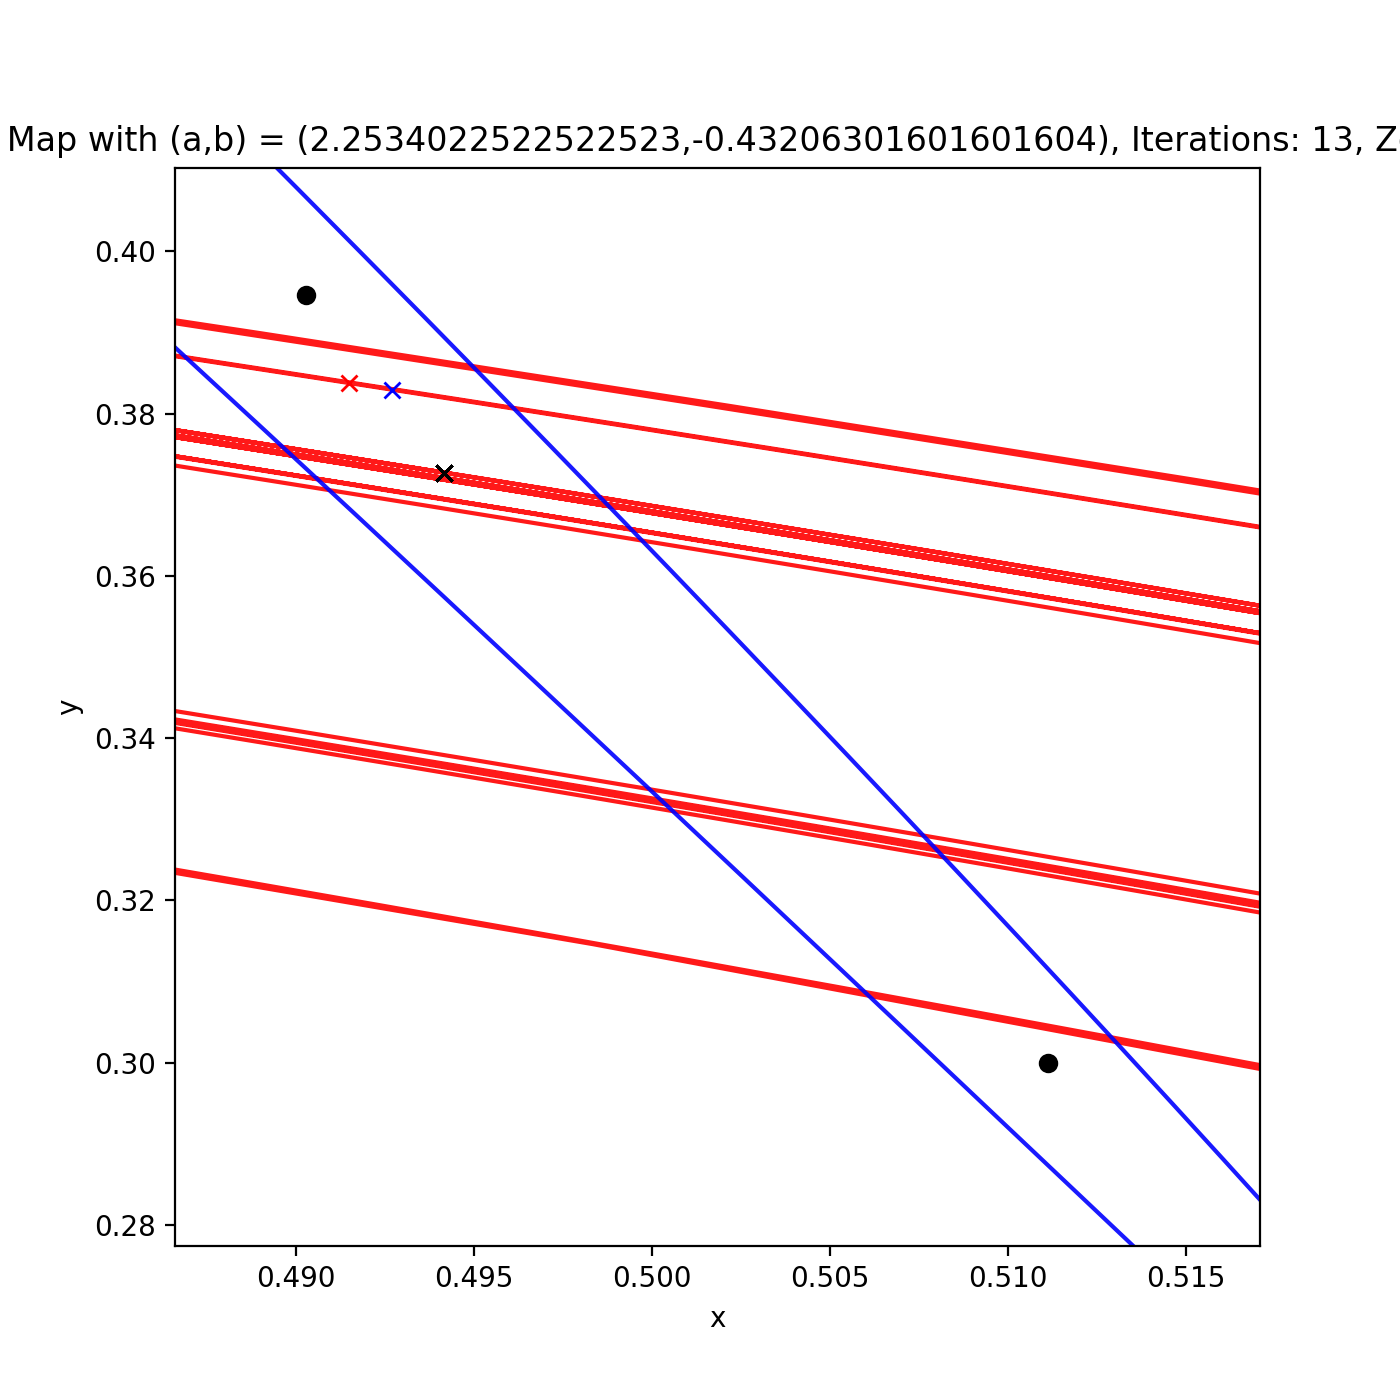

In [43]:
#b_val, a_val = -0.431703, 2.25276#Tangent Per 6: -0.30266666666665937 , 1.3032275   # Tangent:  -0.302575, 1.3033249088285506083 
#b_val,a_val = -0.433847, 2.25659 #midway
a_val = 2.2534022522522523
b_val = -0.43206301601601604
 
#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

uCut = 2
unstLeft_cut =   -176#-7#0 #1.4
unstRight_cut =  176#23.756557715661007#2.58401023 

sCut = 10
stLeft_cut = -10000#-656.8479902992511
stRight_cut = 10000

density = 300000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density*20,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density*20,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [1.2374246239169595 ,  -0.008336054464298156] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 2.5
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


#plt.xlim([midx-lim,midx+lim])
plt.xlim(-1.5,1.5)
plt.ylim(-2,5)
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'.',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)

# x_i,y_i =-0.282927, 0.746159
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='black')
# x_i,y_i = -0.233654, 0.731181
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='yellow')
# x_i,y_i = -0.144449, 0.706749
for i in range(400,500):
    xy = NhMap_n(a_val,b_val,0.7405849810673275,0,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')

plt.plot([0.7405849810673275],[0],'x',color='red')
xy1 = [0.7405849810673275,0]
xy2 = [0.740605008328963,0]
i = 5
xy1_i = hMap_n( 2.2534022522522523,-0.43206301601601604,xy1[0],0,i)
xy2_i = hMap_n( 2.253492342342342,-0.43211343443443445,xy2[0],0,i)
plt.plot([xy1_i[0]],[xy1_i[1]],'x',color='red')
plt.plot([xy2_i[0]],[xy2_i[1]],'x',color='blue')

corner1 = [0.49026,0.3946]
corner2 = [0.51111,0.3]

plt.plot([corner1[0]],[corner1[1]],'o',color='black')
plt.plot([corner2[0]],[corner2[1]],'o',color='black')

0.42032049305487174


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.25


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:24: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.5


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:32: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.75


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:39: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.420320493054872


<IPython.core.display.Javascript object>


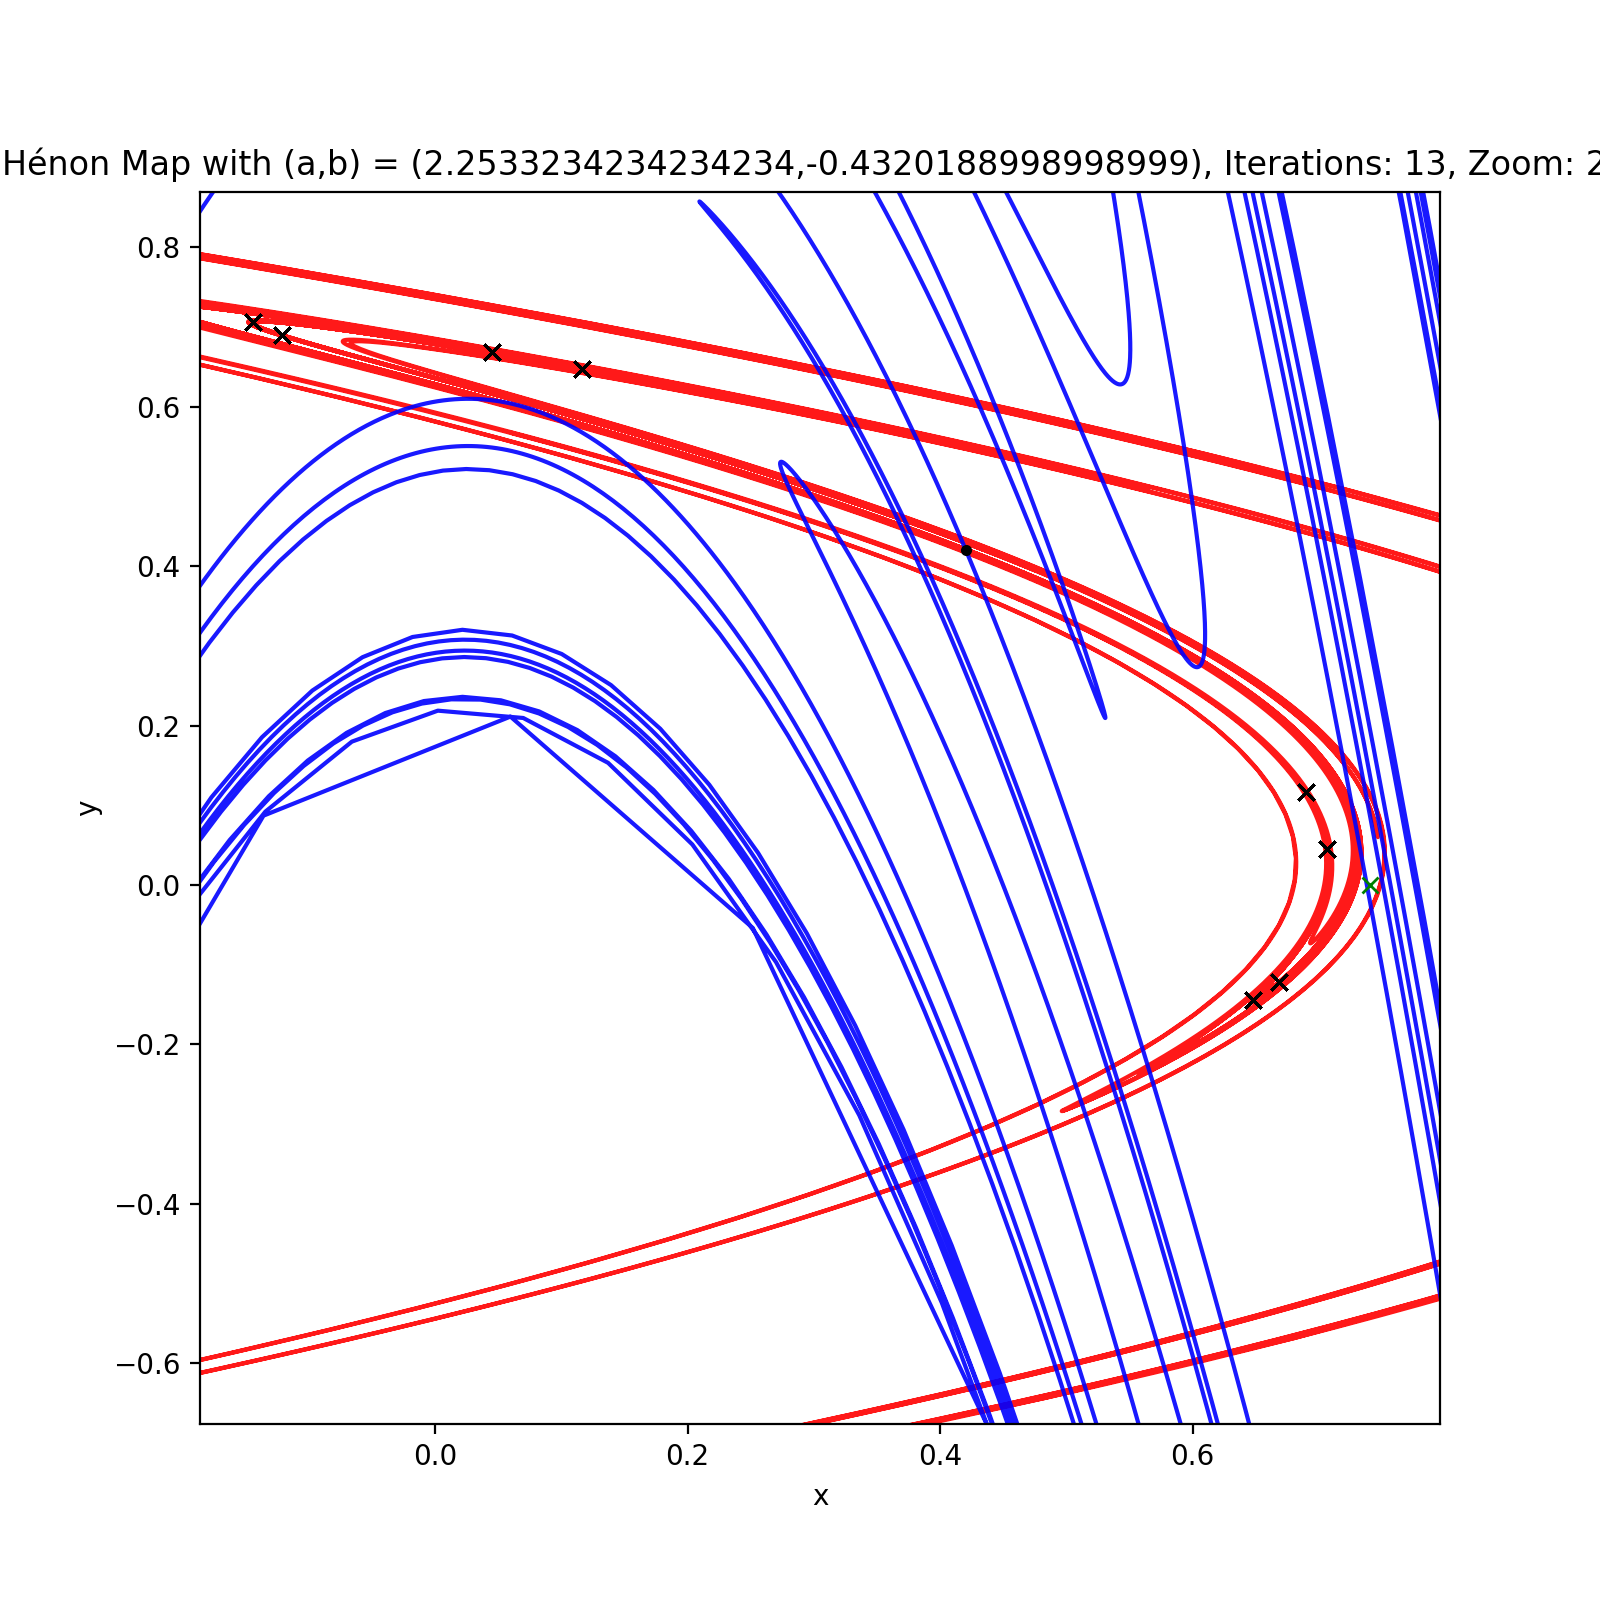

In [30]:

b_val, a_val = -0.431703, 2.25276#Tangent Per 6: -0.30266666666665937 , 1.3032275   # Tangent:  -0.302575, 1.3033249088285506083 
#b_val,a_val = -0.433847, 2.25659 #midway
a_val =2.2533234234234234
b_val =-0.4320188998998999 
 
#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

uCut = 2
unstLeft_cut =   -176#-7#0 #1.4
unstRight_cut =  176#23.756557715661007#2.58401023 

sCut = 10
stLeft_cut = -10000#-656.8479902992511
stRight_cut = 10000

density = 300000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density*20,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density*20,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [1.2374246239169595 ,  -0.008336054464298156] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 2.5
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


#plt.xlim([midx-lim,midx+lim])
plt.xlim(-1.5,1.5)
plt.ylim(-2,5)
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'.',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)

# x_i,y_i =-0.282927, 0.746159
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='black')
# x_i,y_i = -0.233654, 0.731181
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='yellow')
# x_i,y_i = -0.144449, 0.706749
for i in range(400,500):
    xy = NhMap_n(a_val,b_val,0.740605008328963,0,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
plt.plot([0.7405849810673275],[0],'x',color='green')

0.41935385615162946


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:16: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.25


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:24: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.5


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:32: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.75


/var/folders/xm/j0cpbp2j1gb58fd7z9_z4x400000gn/T/ipykernel_65998/498584471.py:39: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  s_vals = np.linspace(left_cut,right_cut,dens, dtype = np.complex)


0.419353856151629


<IPython.core.display.Javascript object>


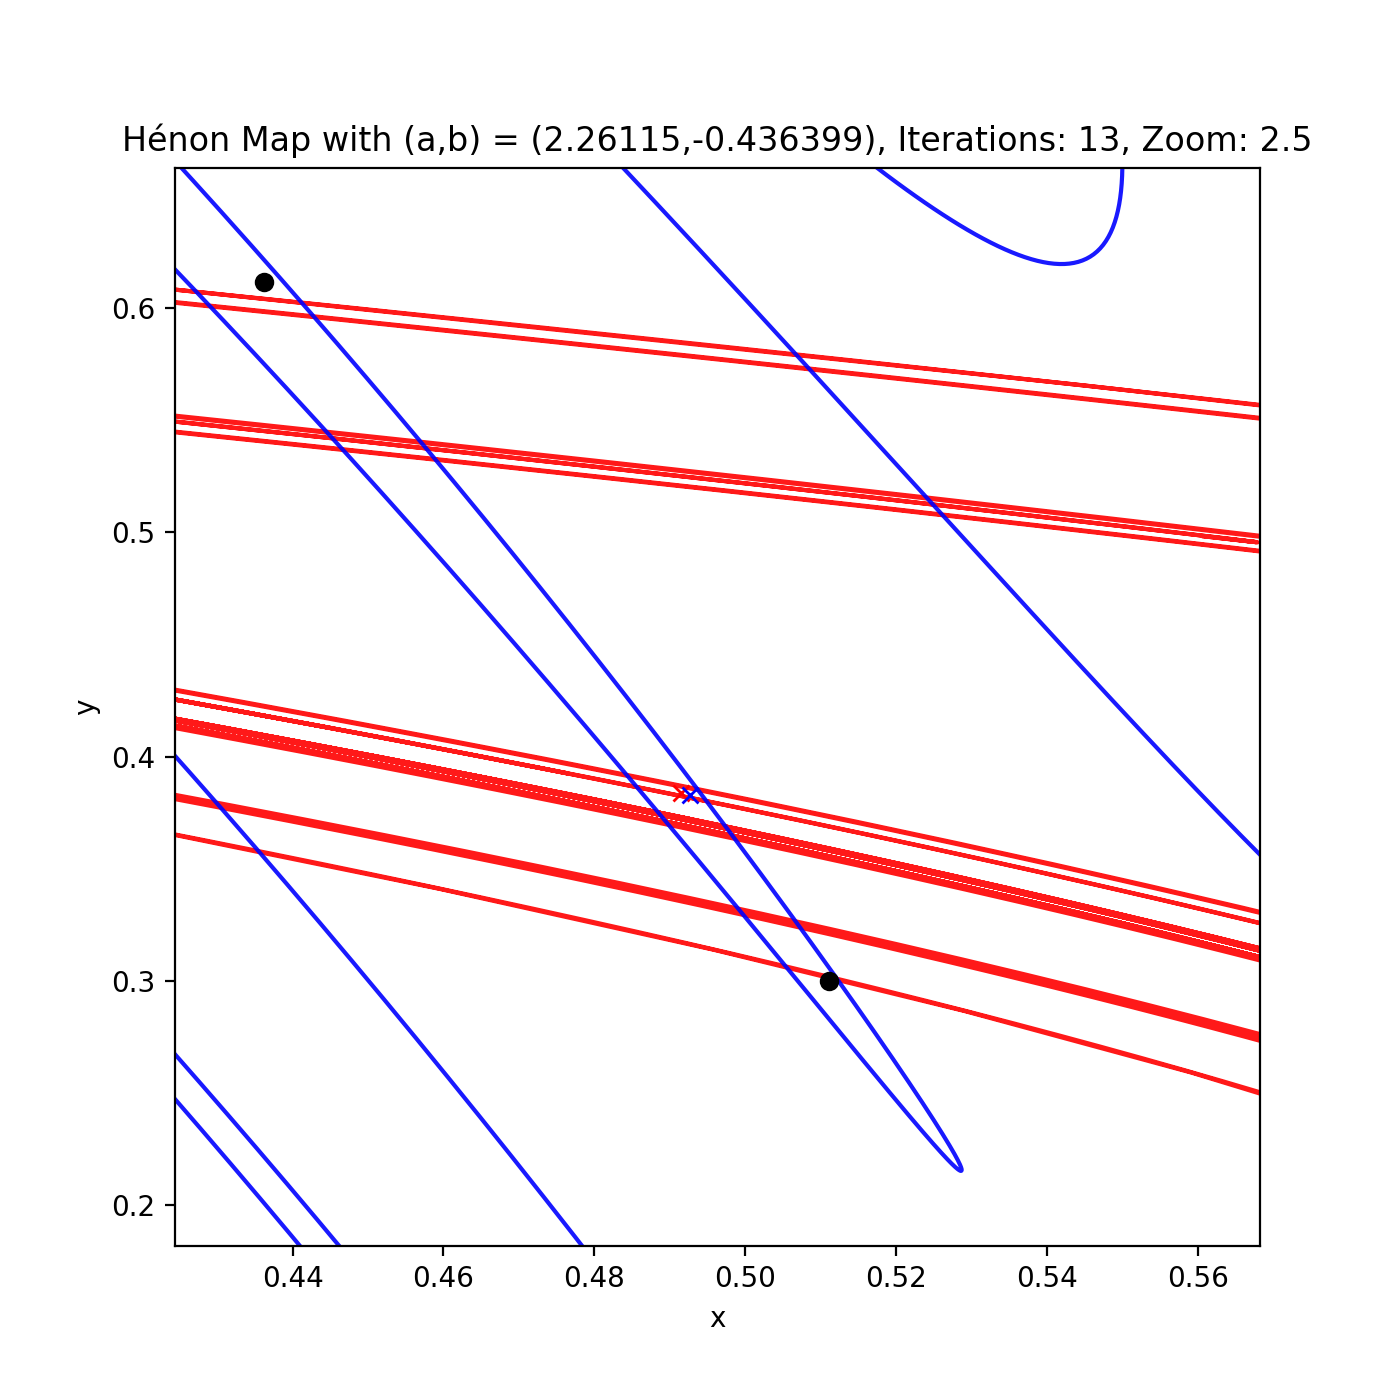

In [49]:
#b_val, a_val = -0.431703, 2.25276#Tangent Per 6: -0.30266666666665937 , 1.3032275   # Tangent:  -0.302575, 1.3033249088285506083 
#b_val,a_val = -0.433847, 2.25659 #midway
#a_val = 2.2499
#b_val = -0.430103

#mid
b_val,a_val = -0.43206301601601604, 2.2534022522522523

#left
b_val, a_val = -0.436399, 2.26115
#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

uCut = 2
unstLeft_cut =   -176#-7#0 #1.4
unstRight_cut =  176#23.756557715661007#2.58401023 

sCut = 10
stLeft_cut = -10000#-656.8479902992511
stRight_cut = 10000

density = 300000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density*20,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density*20,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [1.2374246239169595 ,  -0.008336054464298156] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 2.5
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


#plt.xlim([midx-lim,midx+lim])
plt.xlim(-1.5,1.5)
plt.ylim(-2,5)
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'.',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)

# x_i,y_i =-0.282927, 0.746159
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='black')
# x_i,y_i = -0.233654, 0.731181
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='yellow')
# x_i,y_i = -0.144449, 0.706749
for i in range(400,500):
    xy = NhMap_n(a_val,b_val,0.7405849810673275,0,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')

plt.plot([0.7405849810673275],[0],'x',color='red')
xy1 = [0.7405849810673275,0]
xy2 = [0.740605008328963,0]
i = 5
xy1_i = hMap_n( 2.2534022522522523,-0.43206301601601604,xy1[0],0,i)
xy2_i = hMap_n( 2.253492342342342,-0.43211343443443445,xy2[0],0,i)
plt.plot([xy1_i[0]],[xy1_i[1]],'x',color='red')
plt.plot([xy2_i[0]],[xy2_i[1]],'x',color='blue')

corner1 = [0.4362,0.6114]
corner2 = [0.51111,0.3]

plt.plot([corner1[0]],[corner1[1]],'o',color='black')
plt.plot([corner2[0]],[corner2[1]],'o',color='black')

0.4207446616702711
0.25
0.5
0.75
0.420744661670271


<IPython.core.display.Javascript object>


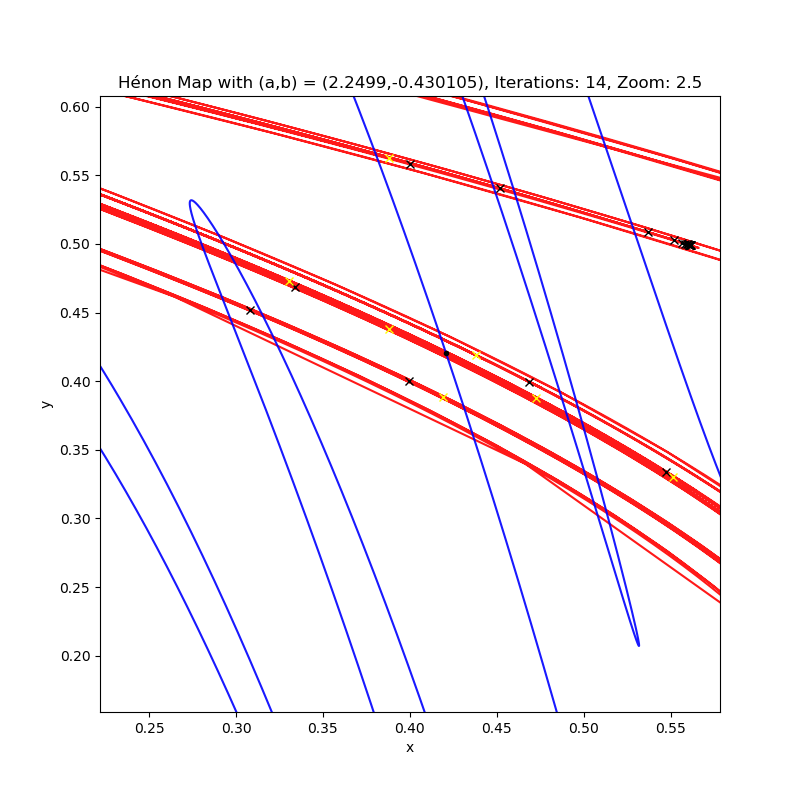

In [29]:
corner1 = [0.503684, 0.329510]
corner2 = [0.504832, 0.323755]

#b_val, a_val = -0.431703, 2.25276#Tangent Per 6: -0.30266666666665937 , 1.3032275   # Tangent:  -0.302575, 1.3033249088285506083 
#b_val,a_val = -0.433847, 2.25659 #midway
#a_val = 2.26107#front
#b_val = -0.436353
#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

# #back
# b_val,a_val = -0.430105, 2.2499


uCut = 2
unstLeft_cut =   -291#-7#0 #1.4
unstRight_cut =  291#23.756557715661007#2.58401023 

sCut = 10
stLeft_cut = -5000#-656.8479902992511
stRight_cut = 5000

density = 300000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density*10,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density*10,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [1.2374246239169595 ,  -0.008336054464298156] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 2.5
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


#plt.xlim([midx-lim,midx+lim])
plt.xlim(-1.5,1.5)
plt.ylim(-2,5)
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'.',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)

x_i,y_i =-0.282927, 0.746159
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
x_i,y_i = -0.233654, 0.731181
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='yellow')
x_i,y_i = -0.144449, 0.706749
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='green')

0.42009046959447666
0.25
0.5
0.75
0.420090469594477


<IPython.core.display.Javascript object>


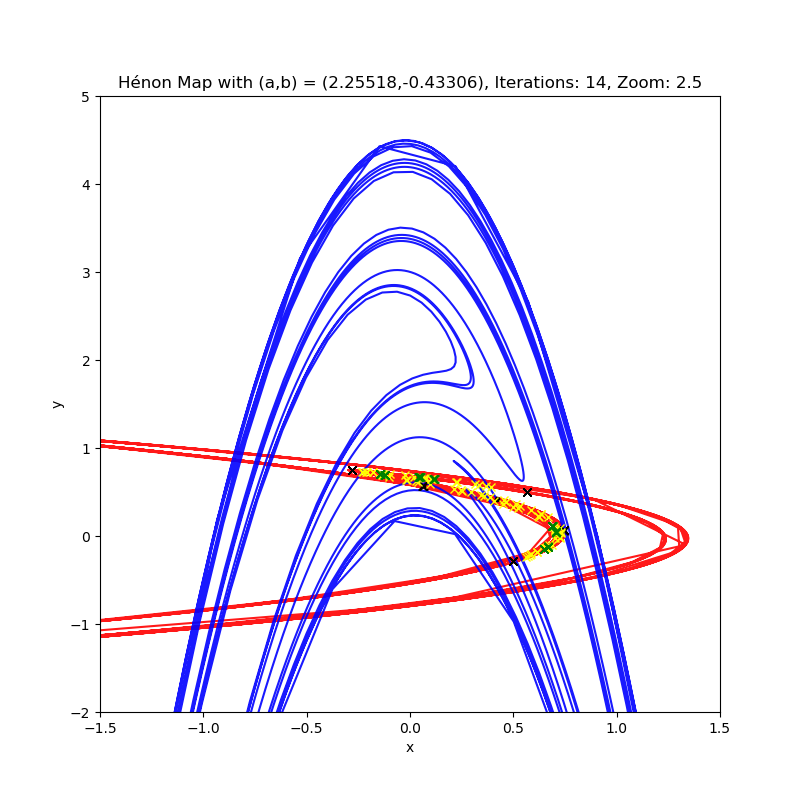

In [14]:
#b_val, a_val = -0.431703, 2.25276#Tangent Per 6: -0.30266666666665937 , 1.3032275   # Tangent:  -0.302575, 1.3033249088285506083 
#b_val,a_val = -0.433847, 2.25659 #midway
#a_val = 2.26107#front
#b_val = -0.436353
#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

# #back
# b_val,a_val = -0.430105, 2.2499
b_val,a_val = -0.43306, 2.25518

uCut = 2
unstLeft_cut =   -291#-7#0 #1.4
unstRight_cut =  291#23.756557715661007#2.58401023 

sCut = 10
stLeft_cut = -5000*2#-656.8479902992511
stRight_cut = 5000*0

density = 300000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density*10,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density*10,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [1.2374246239169595 ,  -0.008336054464298156] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 2.5
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


#plt.xlim([midx-lim,midx+lim])
plt.xlim(-1.5,1.5)
plt.ylim(-2,5)
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'.',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)

x_i,y_i =-0.282927, 0.746159
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
x_i,y_i = -0.233654, 0.731181
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='yellow')
x_i,y_i = -0.144449, 0.706749
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='green')

In [11]:

%matplotlib nbagg
import matplotlib

matplotlib.use('nbagg')

0.5057065061738351
0.25


<string>:2: RuntimeWarning: overflow encountered in square
<string>:2: RuntimeWarning: overflow encountered in multiply
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: invalid value encountered in square


0.5
0.75
0.505706506173835


<IPython.core.display.Javascript object>


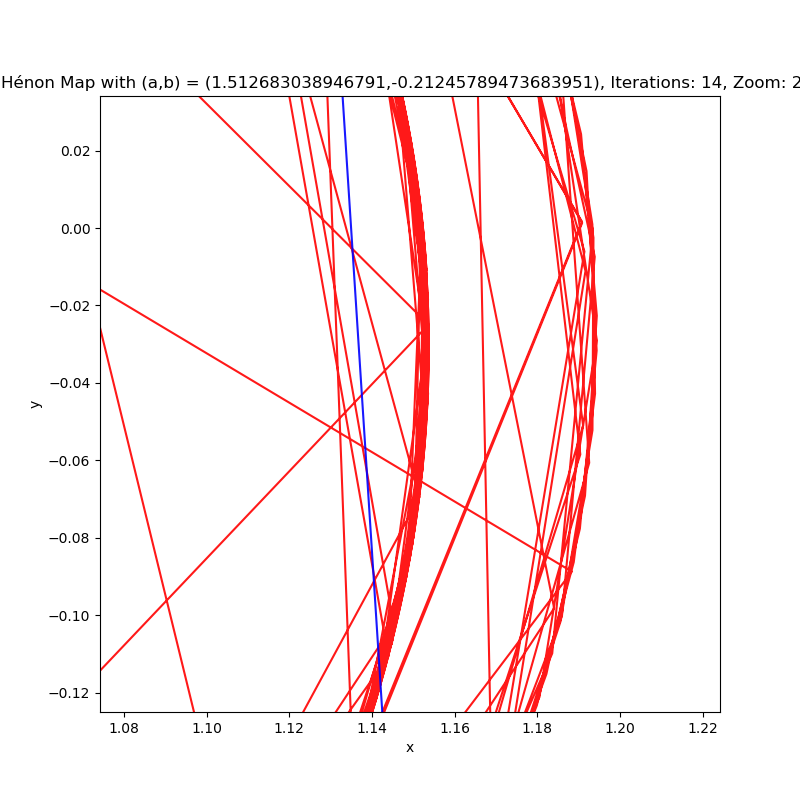

In [24]:
#stable manifoldhalfway!!!!!
#b_val, a_val = -0.431703, 2.25276#Tangent Per 6: -0.30266666666665937 , 1.3032275   # Tangent:  -0.302575, 1.3033249088285506083 
#b_val,a_val = -0.433847, 2.25659 #midway
#a_val = 2.26107#front
#b_val = -0.436353
#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

# #back
# b_val,a_val = -0.430105, 2.2499
b_val,a_val =-0.21245789473683951, 1.512683038946791

uCut = 2
unstLeft_cut =   -100#-7#0 #1.4
unstRight_cut =  100#23.756557715661007#2.58401023 

sCut = 10
stLeft_cut = -1000#-656.8479902992511
stRight_cut = 1000

density = 300000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*2,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*2,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density*2,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density*2,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [1.2374246239169595 ,  -0.008336054464298156] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 2.5
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


#plt.xlim([midx-lim,midx+lim])
plt.xlim(-1.5,1.5)
plt.ylim(-2,5)
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'.',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)

x_i,y_i =0.745414, 0.0603194
for i in range(100):
    xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
    plt.plot(xy[0],xy[1],'x',color='black')
# x_i,y_i = -0.233654, 0.731181
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='yellow')
# x_i,y_i = -0.144449, 0.706749
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='green')
# plt.plot([0.278095, 0.33],[0.519848,0.38],'x',color='green')

In [23]:
#stable manifoldhalfway!!!!! 0.744511, 0.744576
#b_val, a_val = -0.431703, 2.25276#Tangent Per 6: -0.30266666666665937 , 1.3032275   # Tangent:  -0.302575, 1.3033249088285506083 
#b_val,a_val = -0.433847, 2.25659 #midway
#a_val = 2.26107#front
#b_val = -0.436353
#a_val,b_val = 1.175, -0.2974358974358975 #R's vals 
#b_val, a_4sink = -0.2, 1.8 #real sink: 1.024575128939147

# #back
# b_val,a_val = -0.430105, 2.2499
b_val,a_val =-0.21245789473683951, 1.512683038946791

uCut = 2
unstLeft_cut =   -291#-7#0 #1.4
unstRight_cut =  291#23.756557715661007#2.58401023 

sCut = 10
stLeft_cut = -10000#-656.8479902992511
stRight_cut = 10000

density = 300000
#unstRight_cut, stRight_cut = -100000, -55000
u_eig, s_eig = get_eig(b_val,a_val)
print(p_n(b_val,a_val))

xu_valsTan = get_xu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)

print(1/4)
yu_valsTan = get_yu(b_val,a_val,density*20,unstLeft_cut,unstRight_cut)
print(1/2)



xs_valsTan = get_xs(b_val,a_val,density*20,stLeft_cut,stRight_cut)
print(3/4)
ys_valsTan = get_ys(b_val,a_val,density*20,stLeft_cut,stRight_cut)

# for i in range(100):
#     print(xu_valsTan[i],yu_valsTan[i])
#     print(xs_valsTan[i],ys_valsTan[i])
#     print('-------------------------')

q = [1.2374246239169595 ,  -0.008336054464298156] #[-0.5144679256975768, -0.7093697010834852]

#q1 = backwards_hMap(a_val,b_val,q[0],q[1])

midx = 0
midy = 0

p1, p2 = getPeriodic(a_val,b_val)
print(p1)
lim = 2.5
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)  
plt.xlabel('x') 
plt.ylabel('y') 


#plt.xlim([midx-lim,midx+lim])
plt.xlim(-1.5,1.5)
plt.ylim(-2,5)
plt.title('Hénon Map with (a,b) = (' + str(a_val) + ',' + str(b_val) + '), Iterations: '+str(N)+', Zoom: '+str(lim))
ax.plot(xu_valsTan, yu_valsTan, '-', color='red', alpha = 0.9, markersize=.1)

ax.plot(xs_valsTan, ys_valsTan, '-', color='blue', alpha = 0.9, markersize=.1)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# for i in range(3*50):
#     xy = NhMap_n(a_val,b_val,q[0],q[1],i,1)
#     #print(xy)
#     if i > 0:
#         #xy = xy.subs([(a, a_val), (b,b_val )]))
#         plt.plot(xy[0],xy[1],'x',color='black',markersize = 10)
ax.plot([p1],[p1],'.',color='black')
#ax.plot([0.545775104144431],[ -0.5144679257386287],'x',color='green',markersize = 10)
#ax.plot([0.40365149959011326], [0.545775104144431],'x',color='green',markersize = 10)
#ax.plot([q[0]],[q[1]],'x',color='black',markersize = 10)
# ax.plot([q1],[q[0]],'x',color='black',markersize = 10)
# ax.plot([q2],[q1],'x',color='black',markersize = 10)
# ax.plot([q3],[q2],'x',color='black',markersize = 10)
# ax.plot([q4],[q3],'x',color='black',markersize = 10)

# x_i,y_i =-0.234455, 0.731963
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='black')
# x_i,y_i = -0.14549, 0.707668
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='yellow')
# x_i,y_i = -0.144449, 0.706749
# for i in range(100):
#     xy = NhMap_n(a_val,b_val,x_i,y_i,i,1)
#     plt.plot(xy[0],xy[1],'x',color='green')
# plt.plot([0.278095, 0.33],[0.519848,0.38],'x',color='green')

0.5057065061738351


<string>:2: RuntimeWarning: overflow encountered in square
<string>:2: RuntimeWarning: overflow encountered in multiply
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: invalid value encountered in square


KeyboardInterrupt: 

In [20]:
print(1)

1
